# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *Above Import statments are causing conflicts with Pandas and US Zip code so used latest libraries in Colab .*

In [18]:
#Google colab is having library conflicts for nb_black
#%load_ext nb_black
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    make_scorer,
)

## Loading the dataset

In [3]:
#mount goolge drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
# loading the dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/machinelearning/Module project/Loan_Modelling.csv")

## Data Overview

* Observations
* Sanity checks

**Understand the shape of the dataset.**

In [20]:
data.shape

(5000, 14)



*   Data set has 5000 rows and 14 columns

**View the first and last 5 rows of the dataset.**




In [21]:
data.head()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  Mortgage  \
0   1   25           1      49    91107       4    1.6          1         0   
1   2   45          19      34    90089       3    1.5          1         0   
2   3   39          15      11    94720       1    1.0          1         0   
3   4   35           9     100    94112       1    2.7          2         0   
4   5   35           8      45    91330       4    1.0          2         0   

   Personal_Loan  Securities_Account  CD_Account  Online  CreditCard  
0              0                   1           0       0           0  
1              0                   1           0       0           0  
2              0                   0           0       0           0  
3              0                   0           0       0           0  
4              0                   0           0       0           1

In [22]:
data.tail()

ID  Age  Experience  Income  ZIPCode  Family  CCAvg  Education  \
4995  4996   29           3      40    92697       1    1.9          3   
4996  4997   30           4      15    92037       4    0.4          1   
4997  4998   63          39      24    93023       2    0.3          3   
4998  4999   65          40      49    90034       3    0.5          2   
4999  5000   28           4      83    92612       3    0.8          1   

      Mortgage  Personal_Loan  Securities_Account  CD_Account  Online  \
4995         0              0                   0           0       1   
4996        85              0                   0           0       1   
4997         0              0                   0           0       0   
4998         0              0                   0           0       1   
4999         0              0                   0           0       1   

      CreditCard  
4995           0  
4996           0  
4997           0  
4998           0  
4999           1

### Check the data types of the columns for the dataset.

In [23]:
# let's look at the structure of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Observations -

All the variables are Integers except CCAvg which is a float.
Some of the variables have to be converted to Categorical variable for analysis.

### Summary of the dataset.

In [24]:
data.describe(include="all").T

count          mean          std      min       25%  \
ID                  5000.0   2500.500000  1443.520003      1.0   1250.75   
Age                 5000.0     45.338400    11.463166     23.0     35.00   
Experience          5000.0     20.104600    11.467954     -3.0     10.00   
Income              5000.0     73.774200    46.033729      8.0     39.00   
ZIPCode             5000.0  93169.257000  1759.455086  90005.0  91911.00   
Family              5000.0      2.396400     1.147663      1.0      1.00   
CCAvg               5000.0      1.937938     1.747659      0.0      0.70   
Education           5000.0      1.881000     0.839869      1.0      1.00   
Mortgage            5000.0     56.498800   101.713802      0.0      0.00   
Personal_Loan       5000.0      0.096000     0.294621      0.0      0.00   
Securities_Account  5000.0      0.104400     0.305809      0.0      0.00   
CD_Account          5000.0      0.060400     0.238250      0.0      0.00   
Online              5000.0      0.596800     0.490589      0.0      0.00   
CreditCard          5000.0      0.294000     0.455637      0.0      0.00   

                        50%       75%      max  
ID                   2500.5   3750.25   5000.0  
Age                    45.0     55.00     67.0  
Experience             20.0     30.00     43.0  
Income                 64.0     98.00    224.0  
ZIPCode             93437.0  94608.00  96651.0  
Family                  2.0      3.00      4.0  
CCAvg                   1.5      2.50     10.0  
Education               2.0      3.00      3.0  
Mortgage                0.0    101.00    635.0  
Personal_Loan           0.0      0.00      1.0  
Securities_Account      0.0      0.00      1.0  
CD_Account              0.0      0.00      1.0  
Online                  1.0      1.00      1.0  
CreditCard              0.0      1.00      1.0

Observations

1.   Average age of customers is 45 years
2.   Average expereince is 20 years , expereince field has some negative values which are need to be treated.
3.   Average income is $73k , there is big difference between 75% percentile income 94k to maximum income 224k , there is a possibility of outliers in income data.
4.   Average family size is 2.
5.   more than 50% of cutomers use online banking
6.   Average mortgage anount is 56k with maximum mortgage amount 635K, there is huge difference between 75th percentile and maximum mortgage.


In [25]:
# checking for unique values in ID column
data["ID"].nunique()

5000

**Since all the values in ID column are unique we can drop it**

In [26]:
#Drop the ID column
data.drop(["ID"], axis=1, inplace=True)

### Check for missing values

In [27]:
#Check for nulls in dataset
data.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64



*   There are no missing values in the dataset


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

In [28]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [29]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [30]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate analysis


#### Observations on Age

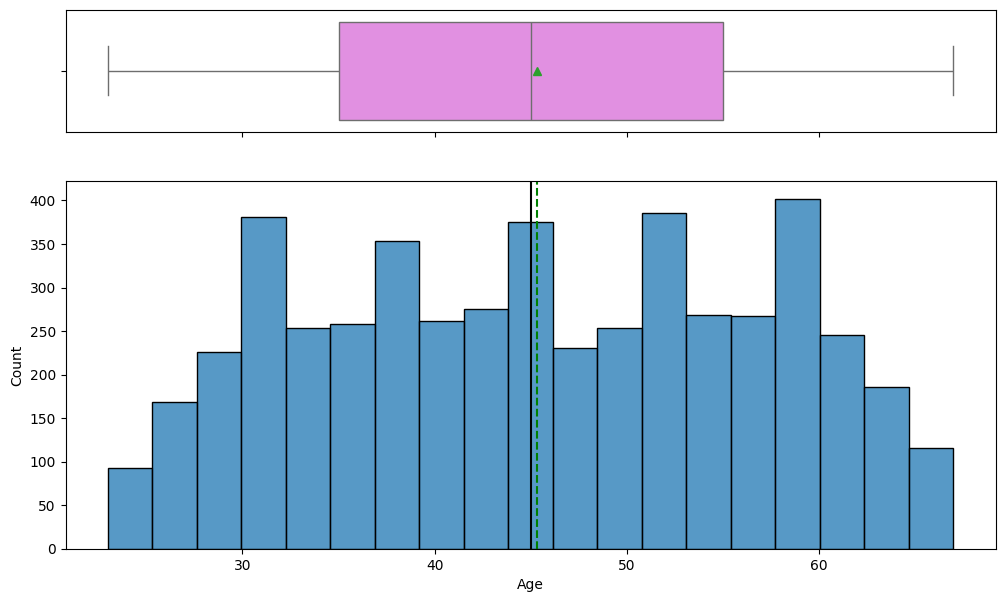

In [31]:
histogram_boxplot(data, "Age")


*   Mean and Median Age of Cusomer is around 45-46 years
*   Majority of customers are between the age of 30-60 years
*   Data  is uniformly distributed



#### Observations on Experience

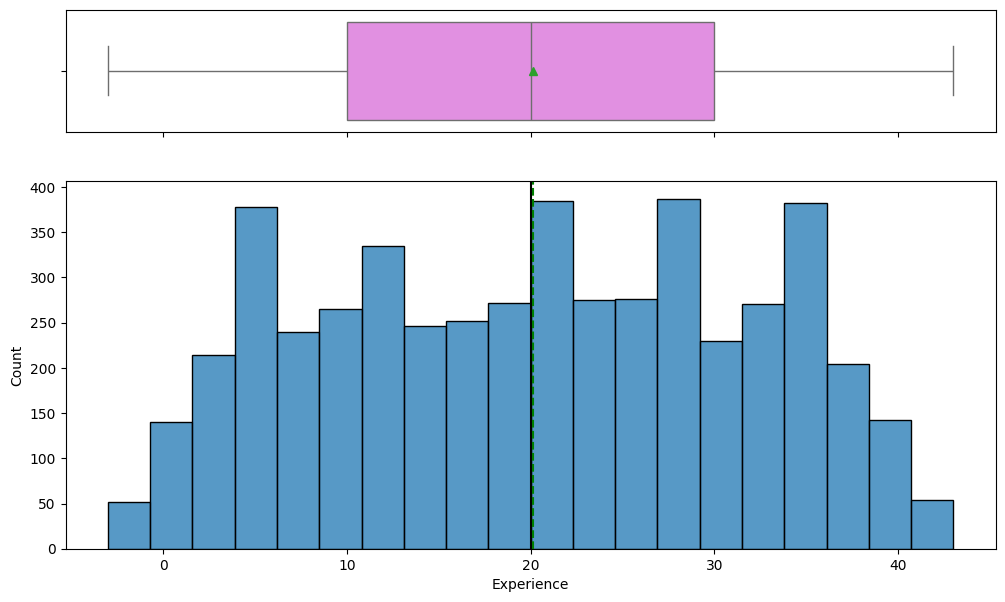

In [32]:
histogram_boxplot(data, "Experience")


*   Mean and Median Experience of Cusomer is 20 years
*   Data is uniformly distributed
*   There are  high concetration customers in 4-6,20-22,28-30,35-36yrs

#### Observations on Income

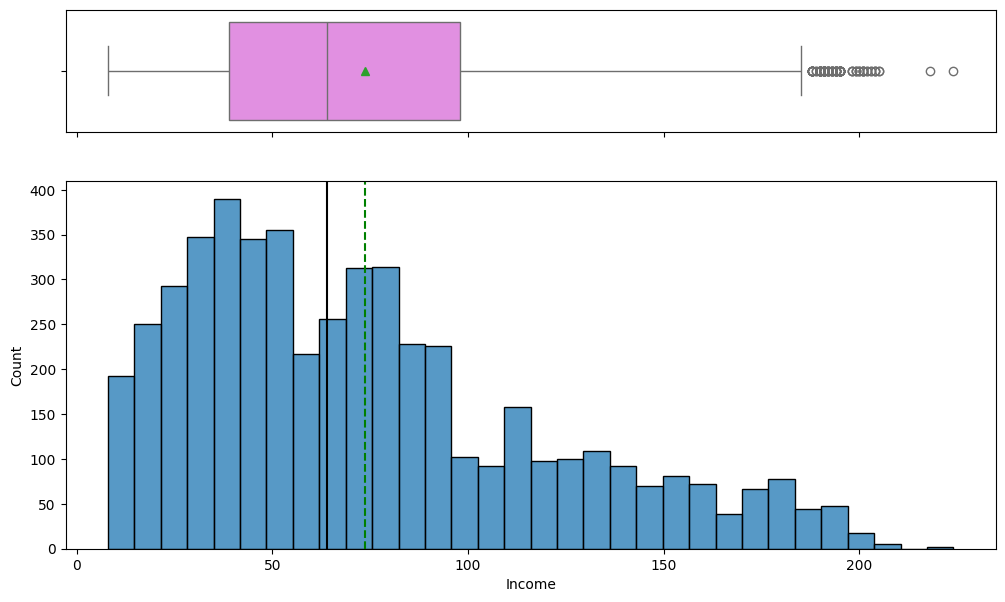

In [33]:
histogram_boxplot(data, "Income")


*   Income data is right skewed
*   There are outliers in income data above 180k

#### Observations on Family

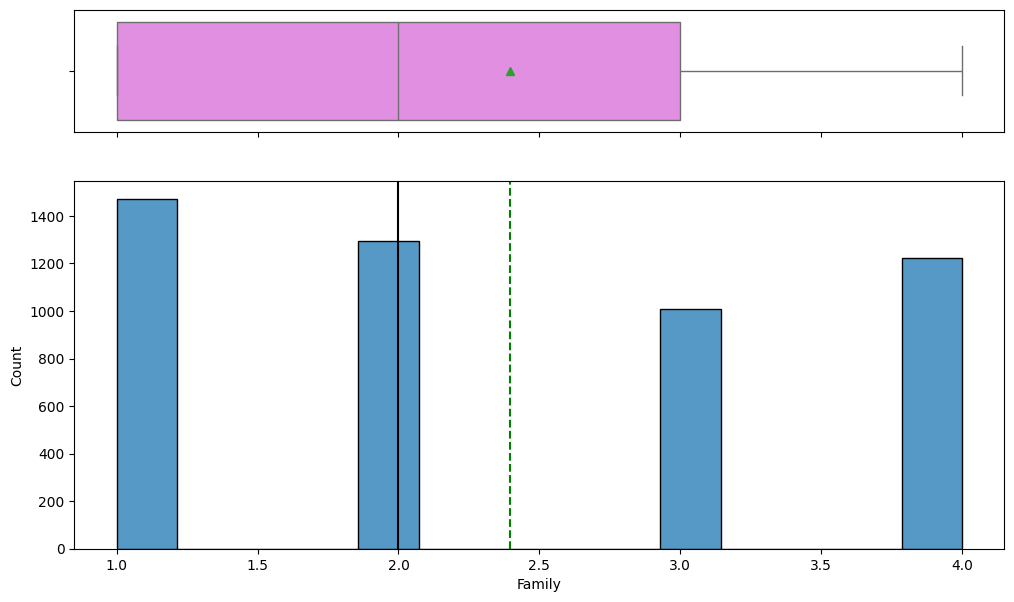

In [34]:
histogram_boxplot(data, "Family")

*   1400+ customers are single
*   Family size of 1 & 2 combined constitute big group of customers

#### Observations on Credit Card Spend

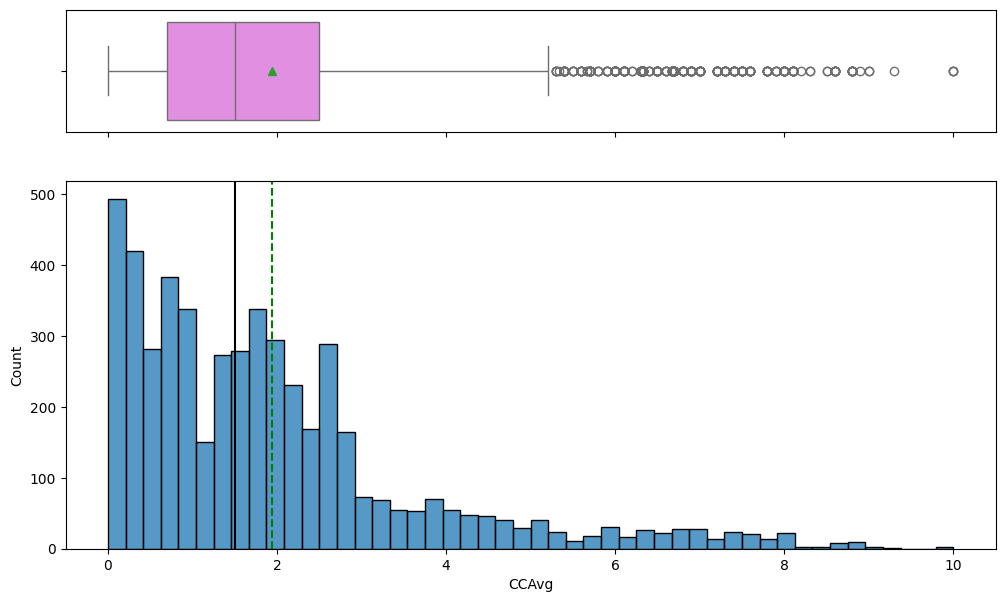

In [35]:
histogram_boxplot(data, "CCAvg")

*   Data is right skewed
*   There are several outliers in the data
*   Median Monthly spend is around 1.3K dollars vs Mean spend close to 2K dollars


#### Observations on Education

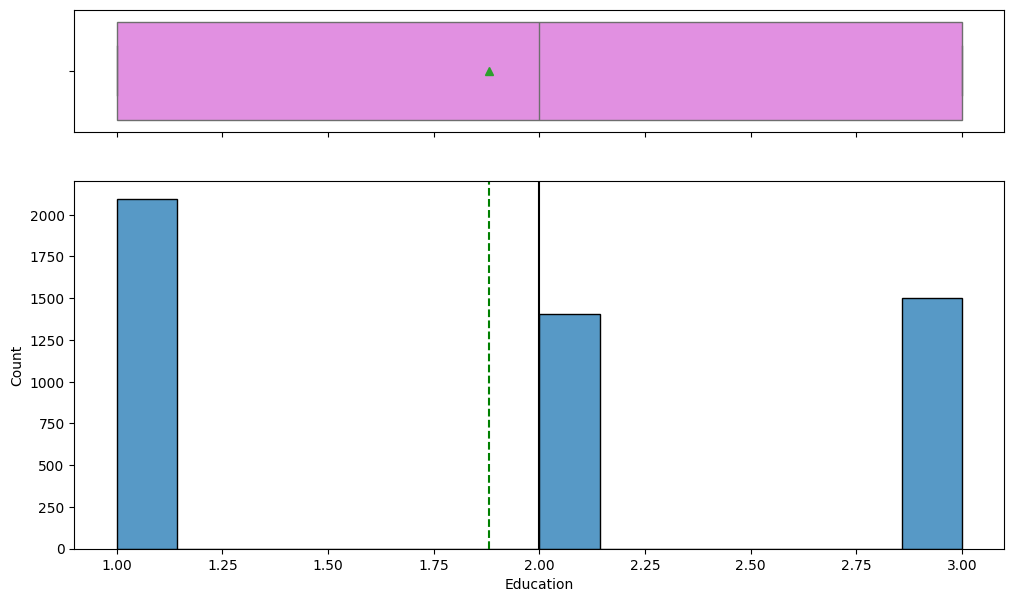

In [36]:
histogram_boxplot(data, "Education")

*   2000+ of customers are under graduates

#### Observations on Mortgage

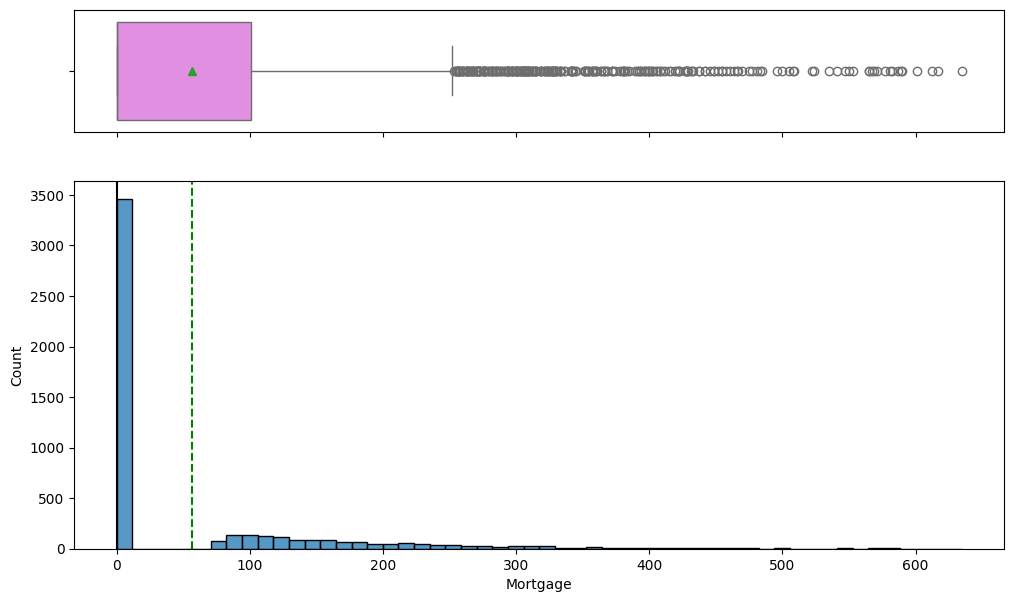

In [37]:
histogram_boxplot(data, "Mortgage")

*   Close to 3400 customers to do not have any mortgage


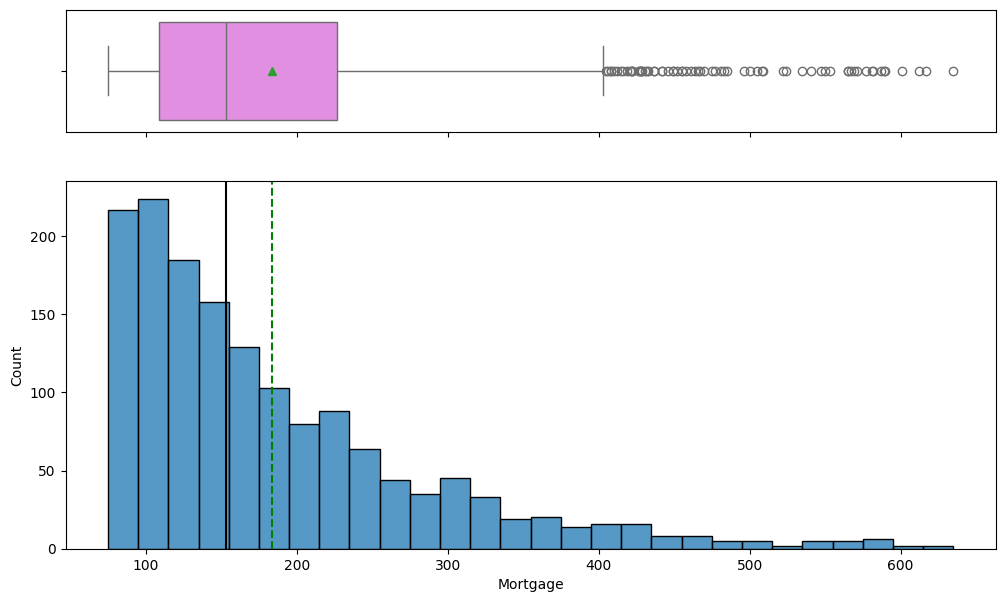

In [38]:
#filter out no Mortgage information to understand data better
data_m = data[data['Mortgage']!=0]

histogram_boxplot(data_m, "Mortgage")


*   Mortgage data right skewed
*   There are few mortagages above 400k.



#### Observations on Personal Loan

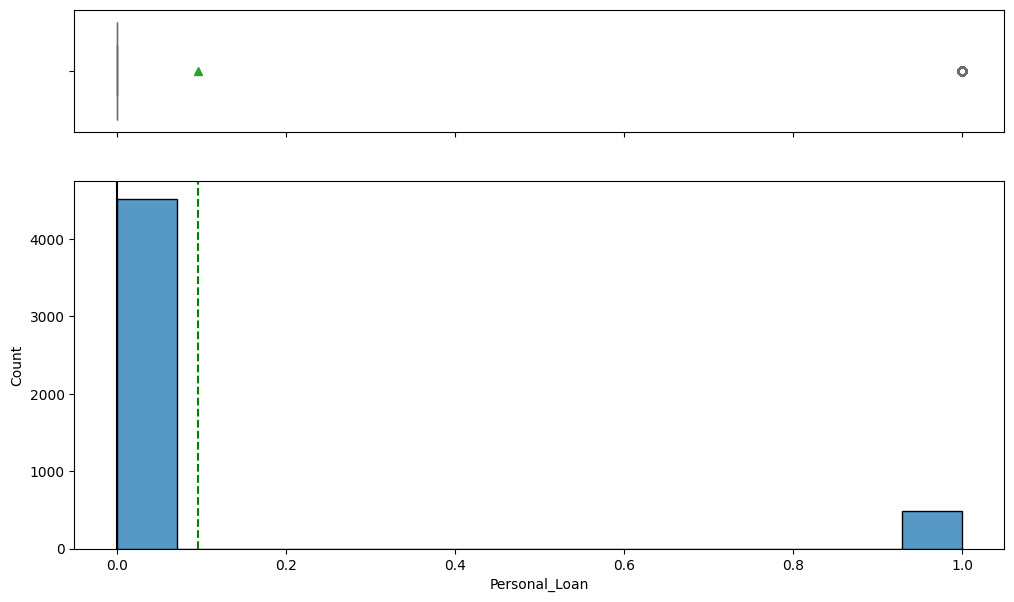

In [39]:
histogram_boxplot(data, "Personal_Loan")

*   There are around 4700+ customers who do not have any personal loans
*   Personal loan is the target variable we are going predict




#### Observations on Securities Account

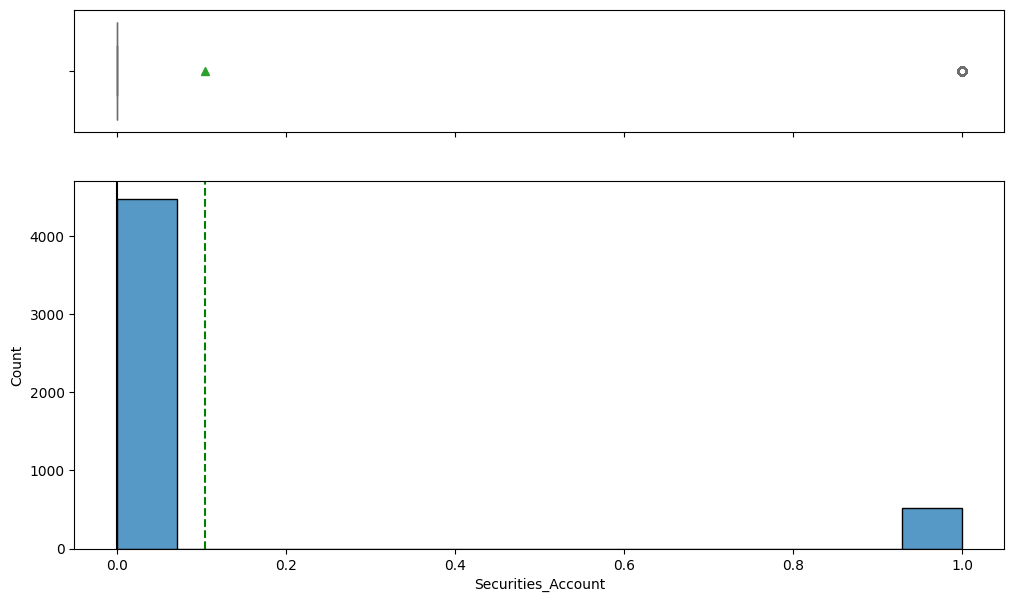

In [40]:
histogram_boxplot(data, "Securities_Account")

*   There are around 4700+ customers who do not have any securities accounts


#### Observations on CD Account

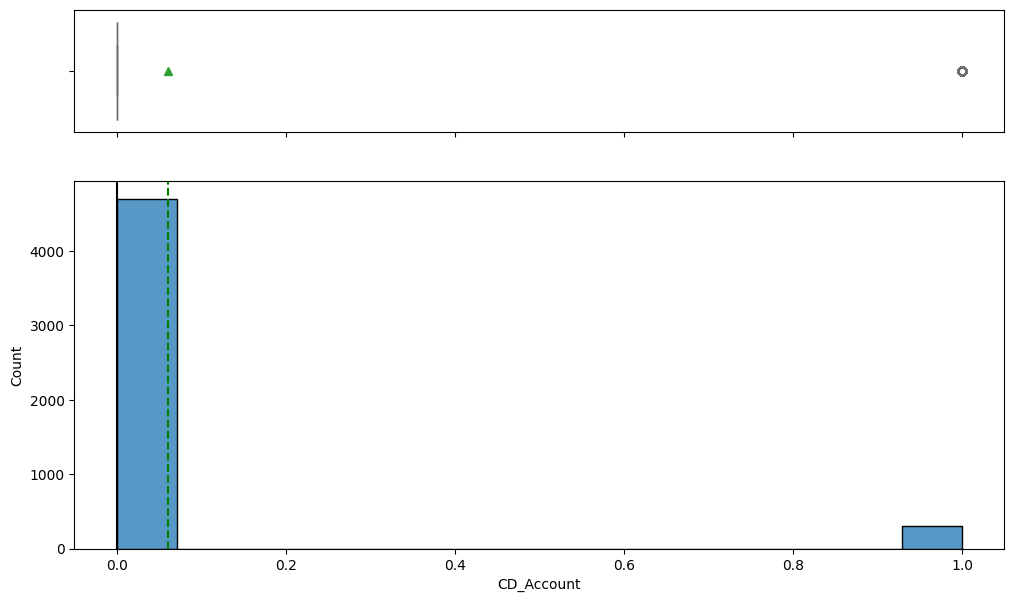

In [41]:
histogram_boxplot(data, "CD_Account")

*   There are very few customers have CD accounts


#### Observations on Online

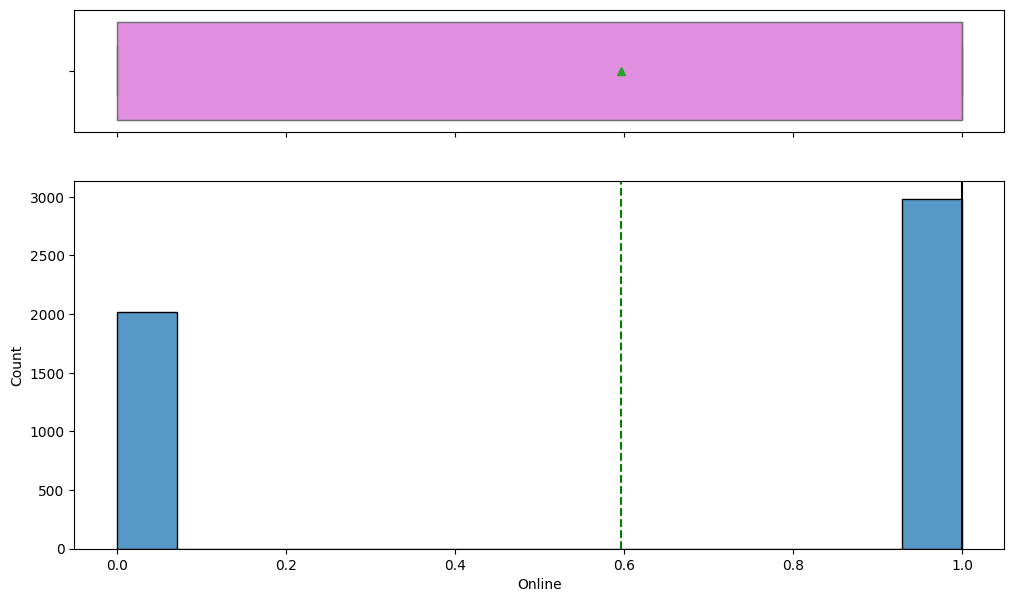

In [42]:
histogram_boxplot(data, "Online")

*   60% of customers use Internet Banking


#### Observations on Credit Card

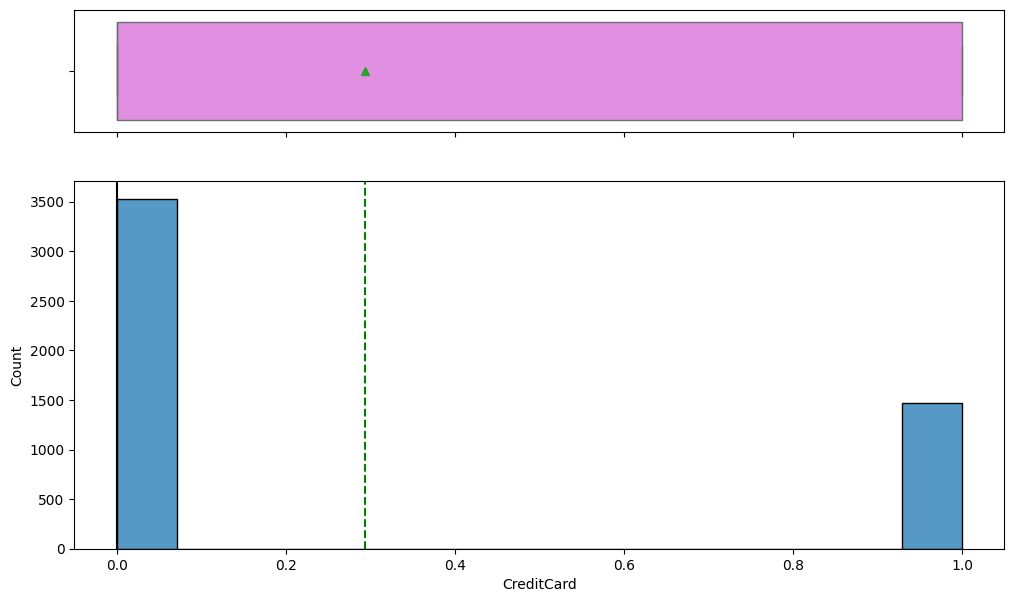

In [43]:
histogram_boxplot(data, "CreditCard")

*   30% of customers have credit cards issued by other banks.


### Bivariate analysis

In [44]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Age vs Personal Loan

Personal_Loan     0    1   All
Age                           
All            4520  480  5000
34              116   18   134
30              119   17   136
36               91   16   107
63               92   16   108
35              135   16   151
33              105   15   120
52              130   15   145
29              108   15   123
54              128   15   143
43              134   15   149
42              112   14   126
56              121   14   135
65               66   14    80
44              107   14   121
50              125   13   138
45              114   13   127
46              114   13   127
26               65   13    78
32              108   12   120
57              120   12   132
38              103   12   115
27               79   12    91
48              106   12   118
61              110   12   122
53              101   11   112
51              119   10   129
60              117   10   127
58              133   10   143
49              105   10   115
47      

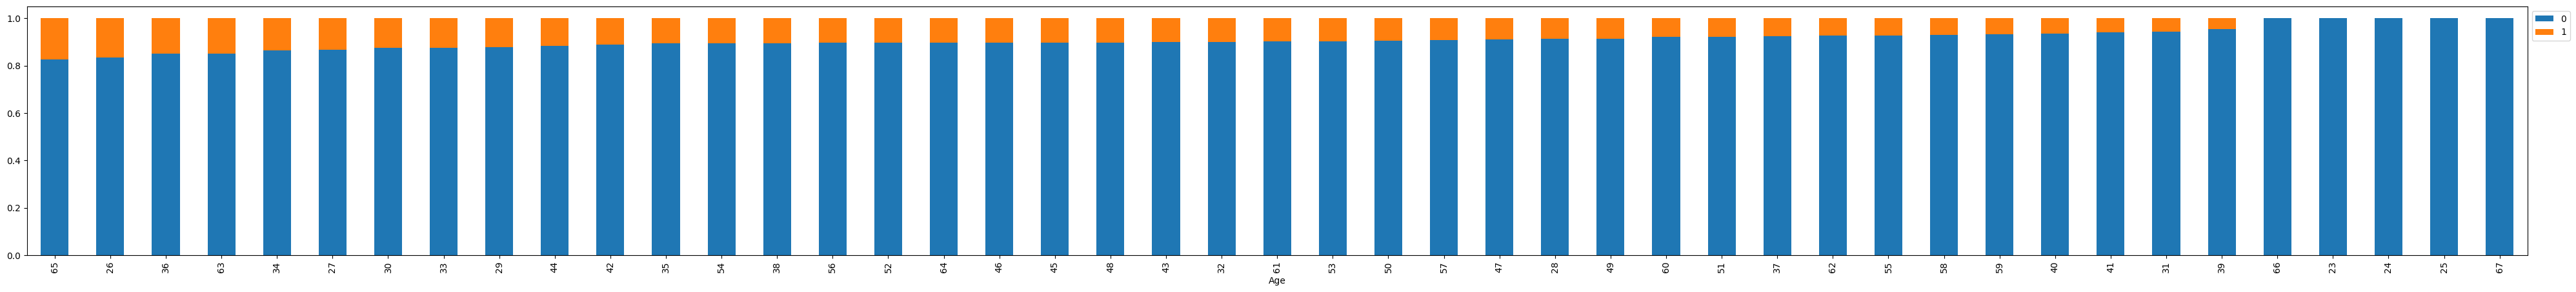

In [45]:
stacked_barplot(data,  "Age","Personal_Loan")

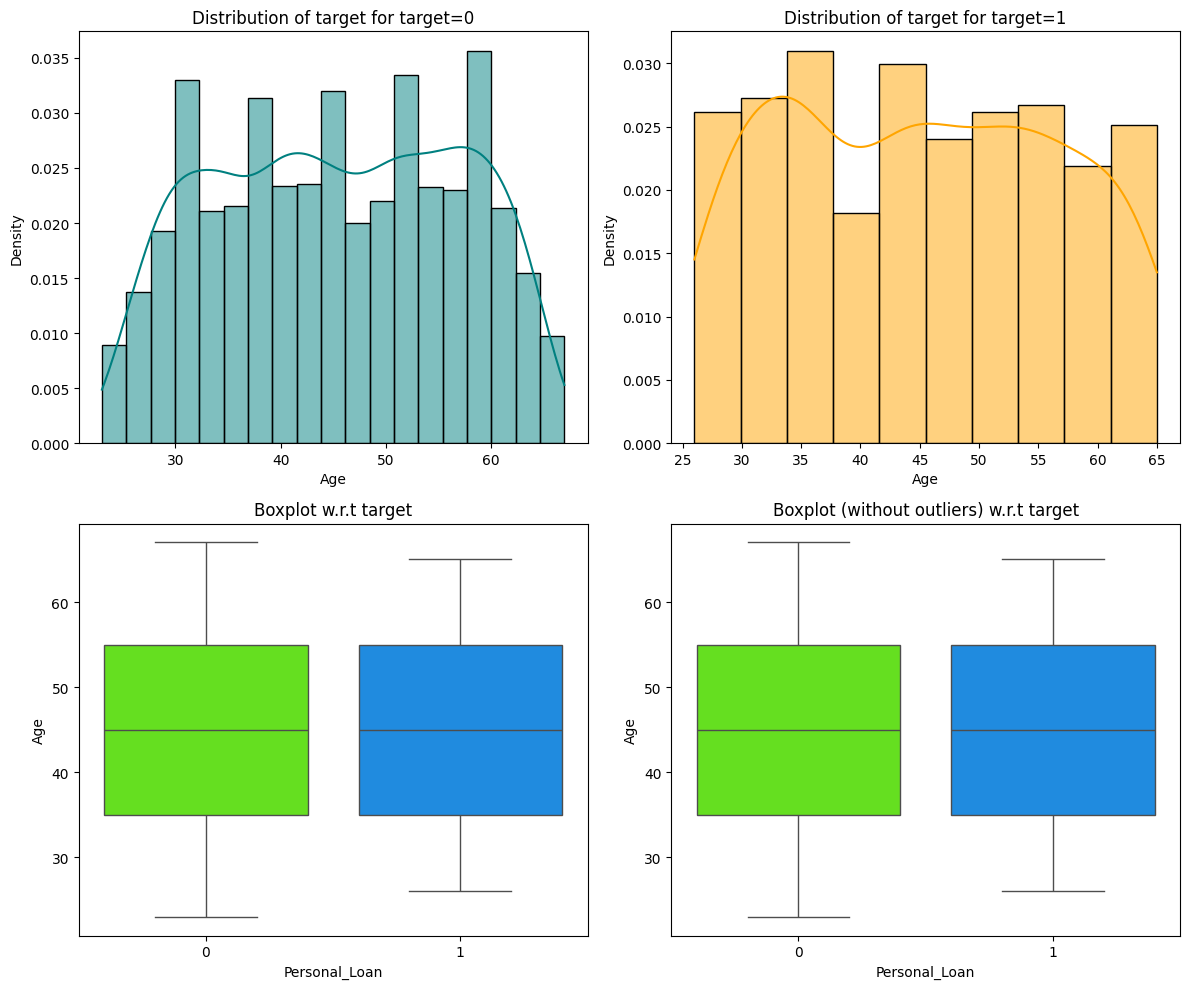

In [46]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

*   Customers between below 26 years (23-25) do not have any personal loans
*   Customers 66 years old and above (66-67) do not have any personal loans


#### Education vs Personal Loan

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


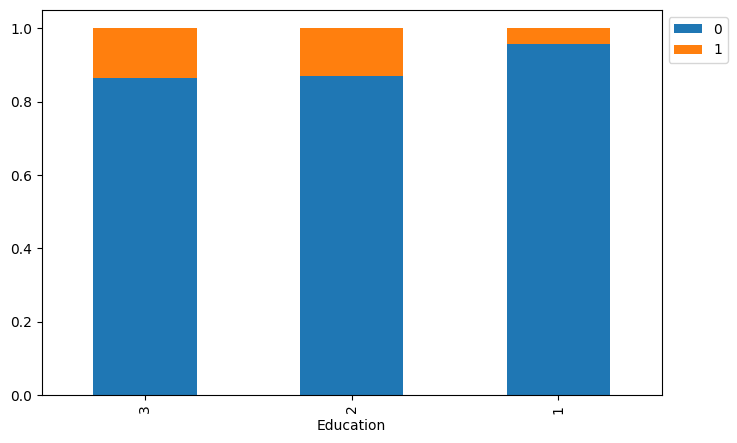

In [47]:
stacked_barplot(data,  "Education","Personal_Loan")

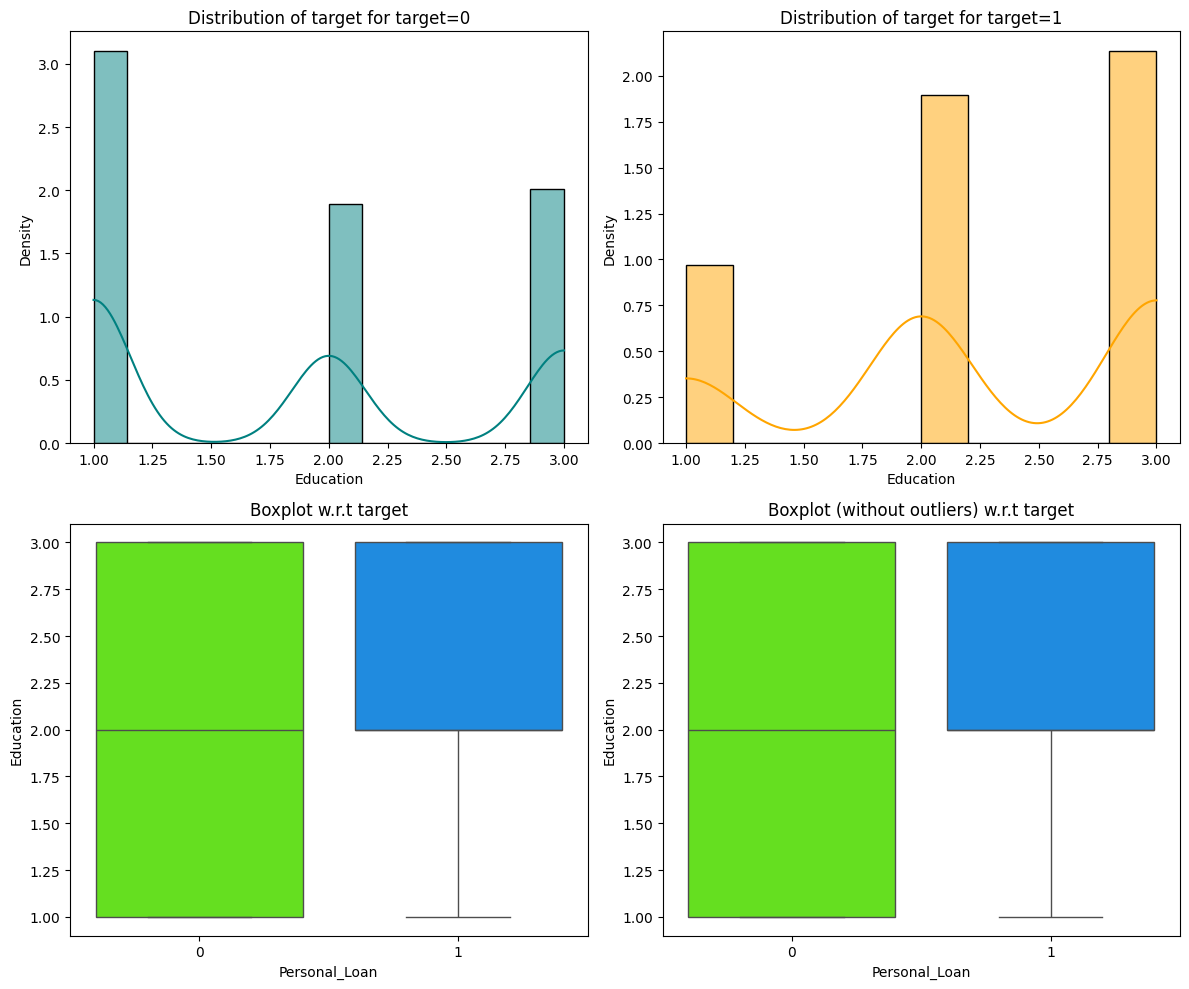

In [48]:
distribution_plot_wrt_target(data, "Education", "Personal_Loan")

*   As Education level is increasing Customers are applying for more Personal loans

#### Income vs Personal Loan

Personal_Loan     0    1   All
Income                        
All            4520  480  5000
130               8   11    19
182               2   11    13
158               8   10    18
135               8   10    18
179               8    9    17
141              15    9    24
154              12    9    21
123               9    9    18
184               3    9    12
142               7    8    15
131              11    8    19
129              15    8    23
172               3    8    11
173               5    8    13
170               4    8    12
180              10    8    18
115              19    8    27
125              16    7    23
164               6    7    13
188               3    7    10
83               67    7    74
114              23    7    30
161               9    7    16
122              17    7    24
133               8    7    15
132              11    7    18
191               6    7    13
134              13    7    20
111              15    7    22
190     

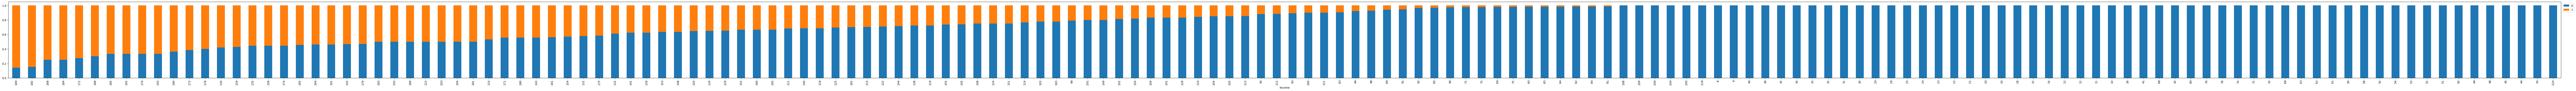

In [49]:
stacked_barplot(data, "Income", "Personal_Loan")

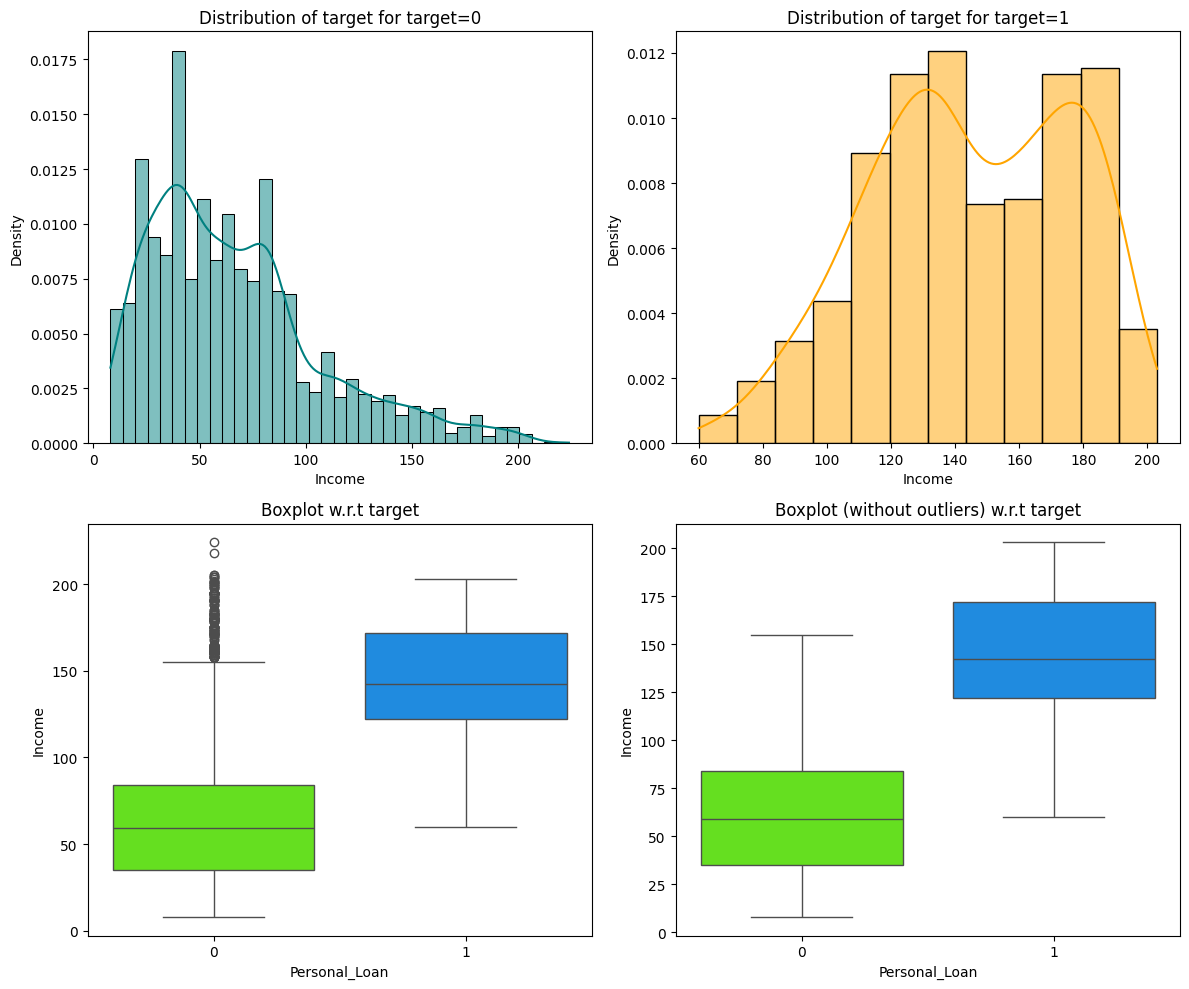

In [50]:
distribution_plot_wrt_target(data, "Income", "Personal_Loan")

*   couple of trends are when Income is below 60k or above 200k  , there is less tendency to have personal loan

#### Experience vs Personal Loan

Personal_Loan     0    1   All
Experience                    
All            4520  480  5000
9               127   20   147
8               101   18   119
20              131   17   148
3               112   17   129
12               86   16   102
32              140   14   154
19              121   14   135
5               132   14   146
25              128   14   142
26              120   14   134
37              103   13   116
11              103   13   116
16              114   13   127
30              113   13   126
22              111   13   124
35              130   13   143
23              131   13   144
36              102   12   114
29              112   12   124
7               109   12   121
6               107   12   119
18              125   12   137
31               92   12   104
28              127   11   138
21              102   11   113
13              106   11   117
17              114   11   125
34              115   10   125
39               75   10    85
27      

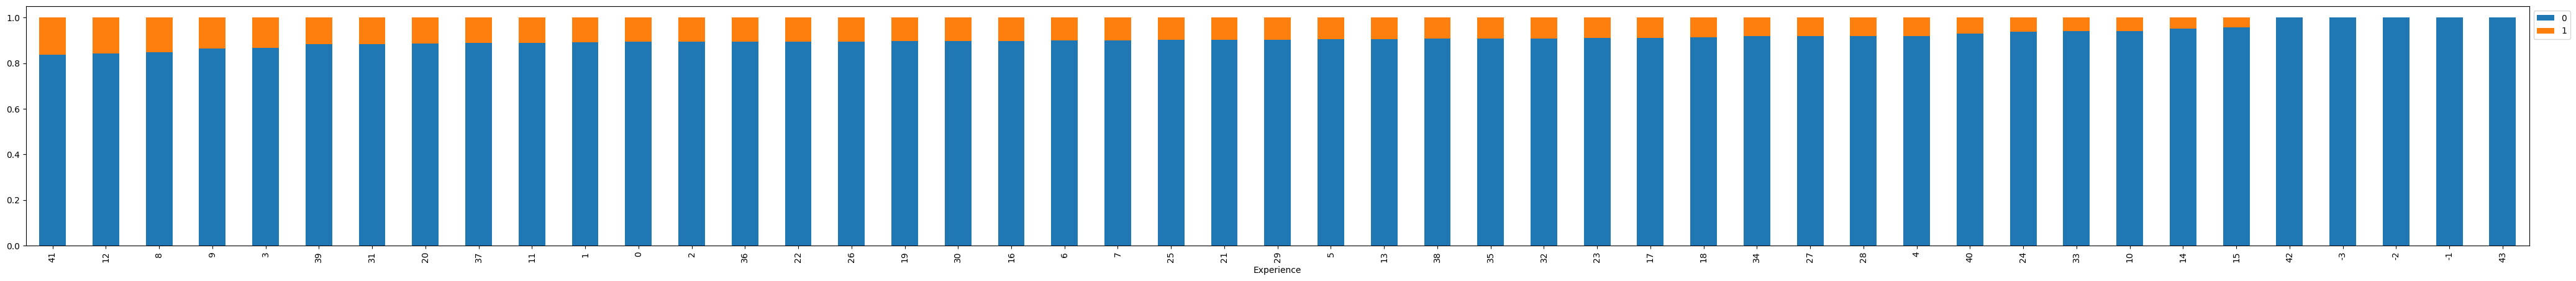

In [51]:
stacked_barplot(data, "Experience", "Personal_Loan")

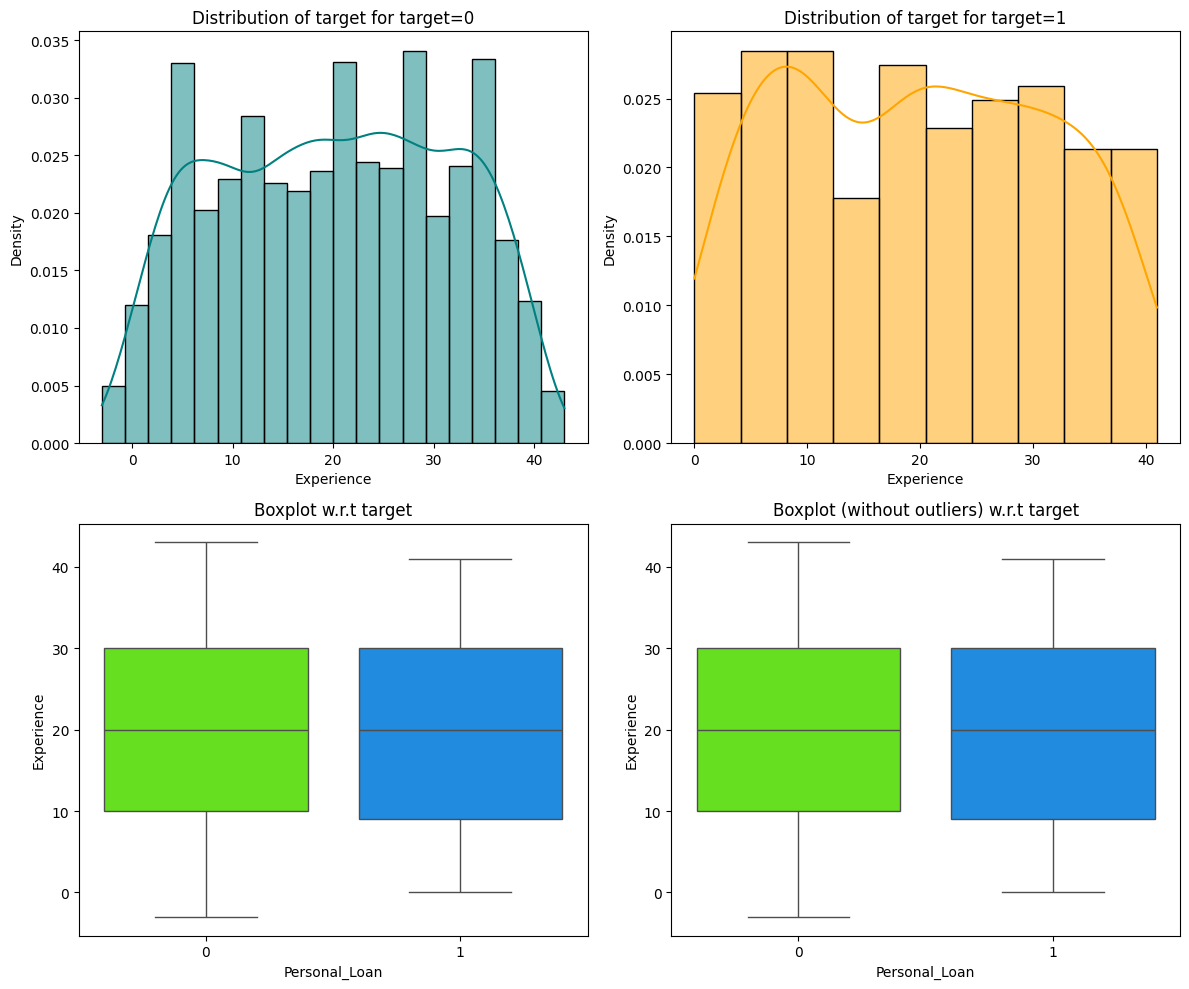

In [52]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan")

*   Customers above 40 years of experience have no personal loans


#### Family vs Personal Loan

Personal_Loan     0    1   All
Family                        
All            4520  480  5000
4              1088  134  1222
3               877  133  1010
1              1365  107  1472
2              1190  106  1296
------------------------------------------------------------------------------------------------------------------------


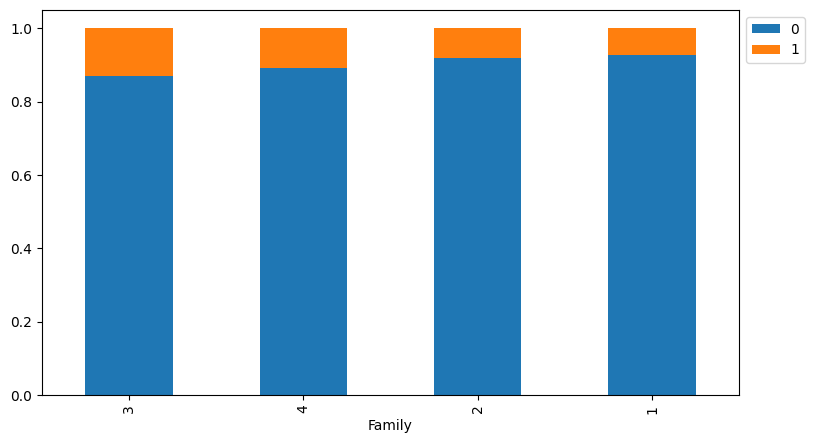

In [53]:
stacked_barplot(data, "Family", "Personal_Loan")

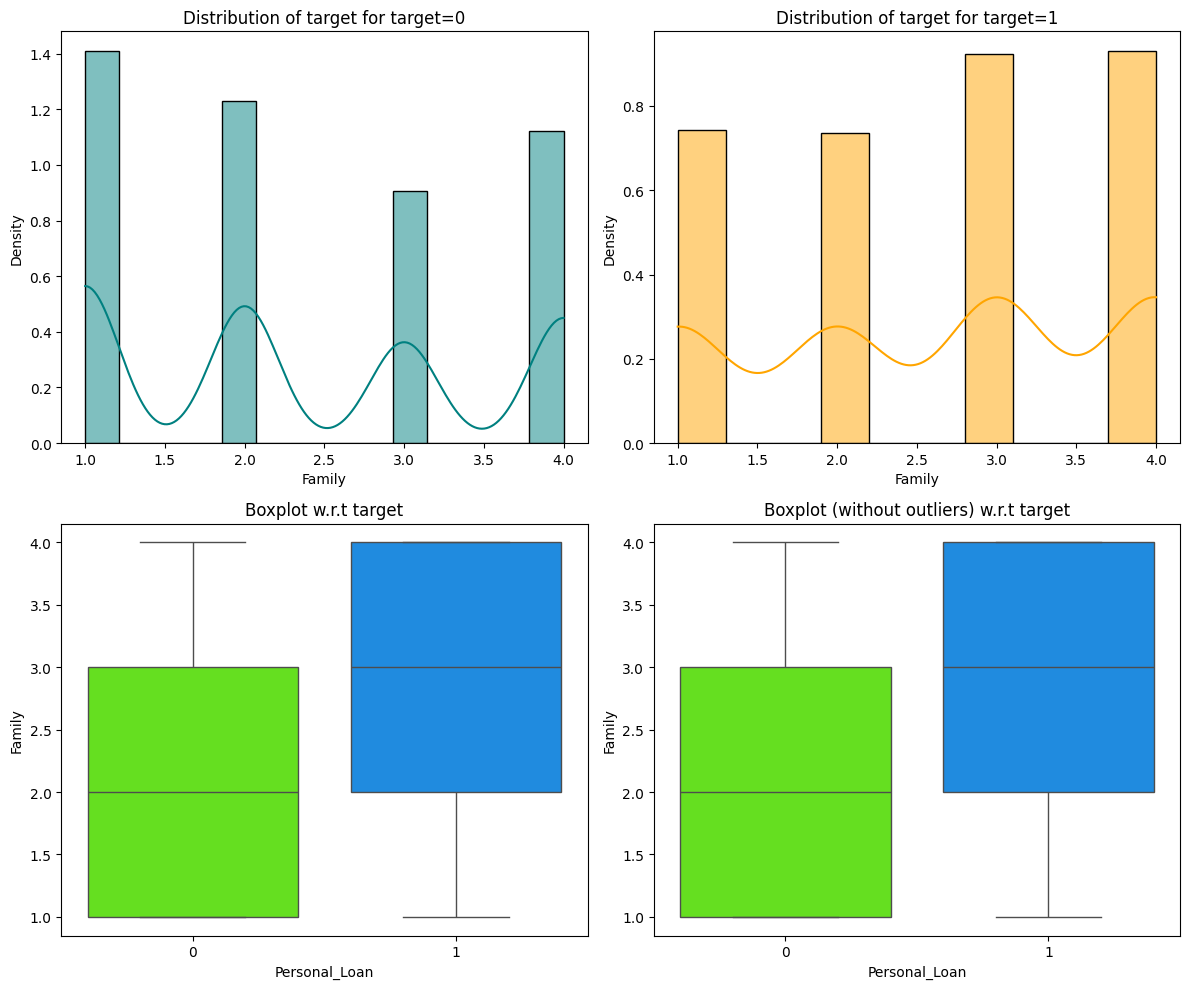

In [54]:
distribution_plot_wrt_target(data, "Family", "Personal_Loan")

*   As Family size increases ,customers have more personal loans


#### CCAvg vs Personal Loan

Personal_Loan     0    1   All
CCAvg                         
All            4520  480  5000
3.0              34   19    53
4.1               9   13    22
3.4              26   13    39
3.1               8   12    20
4.2               0   11    11
5.4               8   10    18
6.5               8   10    18
3.8              33   10    43
3.6              17   10    27
3.3              35   10    45
5.0               9    9    18
3.9              18    9    27
2.9              45    9    54
2.6              79    8    87
6.0              18    8    26
4.4               9    8    17
4.3              18    8    26
0.2             196    8   204
0.5             155    8   163
4.7              17    7    24
5.2               9    7    16
1.3             121    7   128
2.7              51    7    58
3.7              18    7    25
1.1              77    7    84
5.6               0    7     7
4.0              26    7    33
2.2             123    7   130
4.8               0    7     7
5.1     

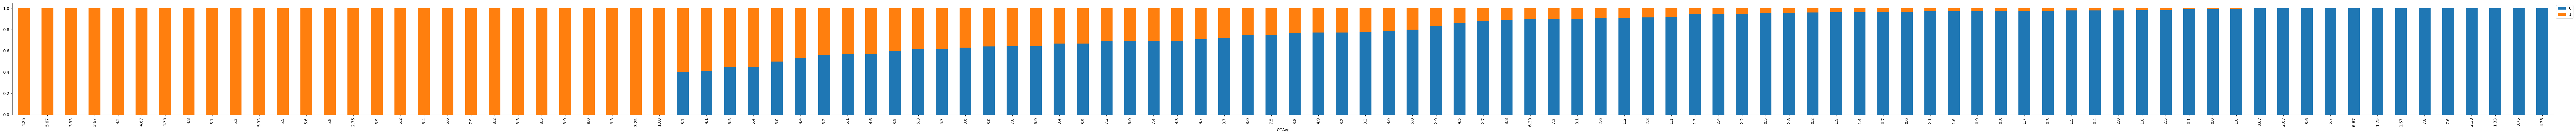

In [55]:
stacked_barplot(data, "CCAvg", "Personal_Loan")

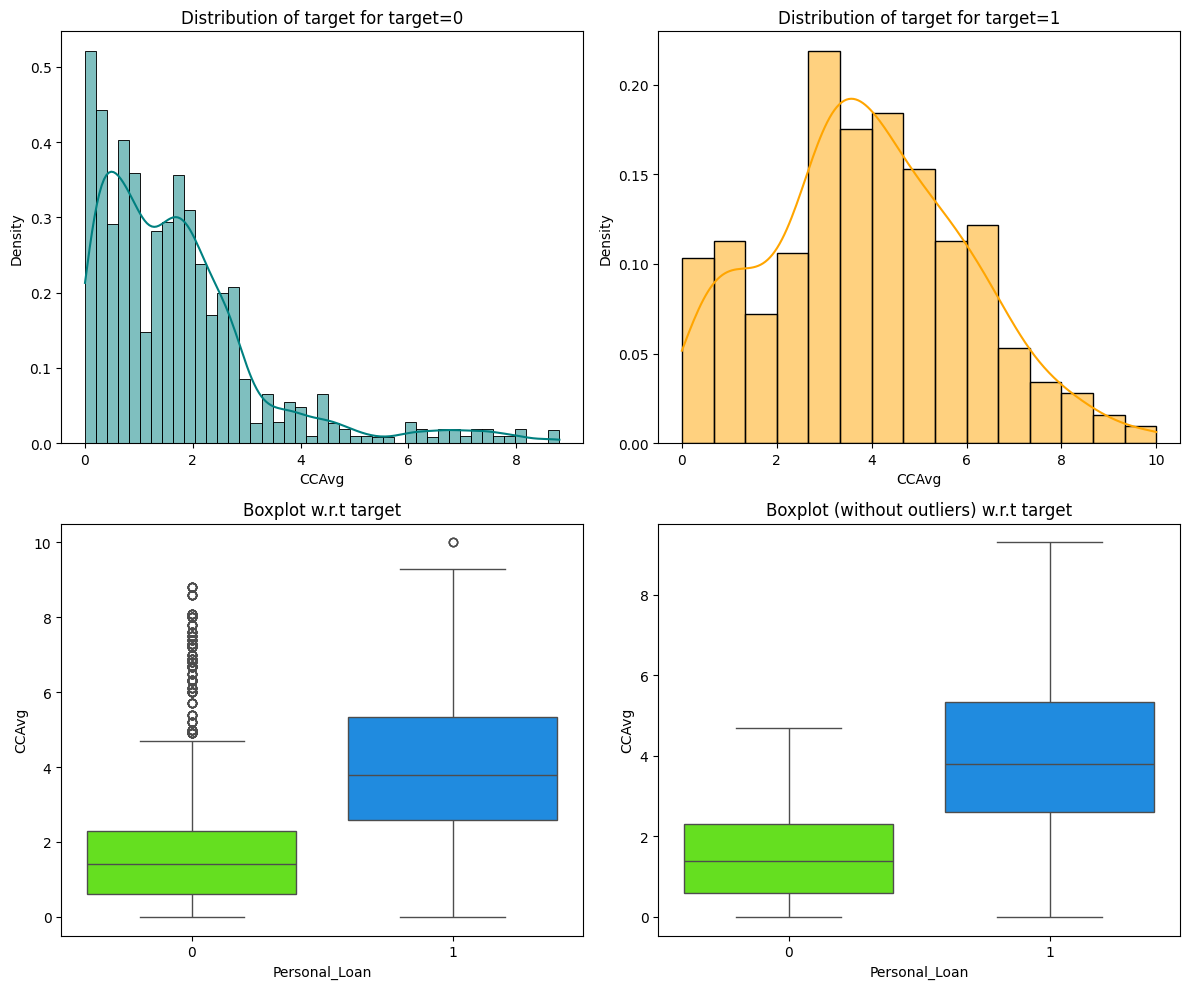

In [56]:
distribution_plot_wrt_target(data, "CCAvg", "Personal_Loan")

*  Customer with Average Credit card balance below 2K have lower tendency for a Personal loan


#### Mortgage vs Personal Loan

Personal_Loan     0    1   All
Mortgage                      
All            4520  480  5000
0              3150  312  3462
301               0    5     5
342               1    3     4
282               0    3     3
...             ...  ...   ...
276               2    0     2
156               5    0     5
278               1    0     1
280               2    0     2
248               3    0     3

[348 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


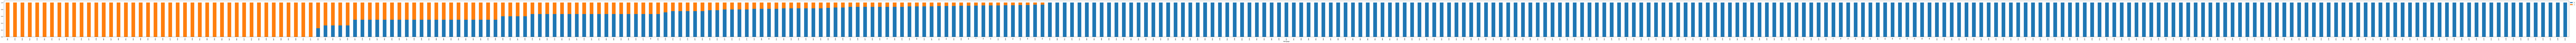

In [57]:
stacked_barplot(data, "Mortgage", "Personal_Loan")

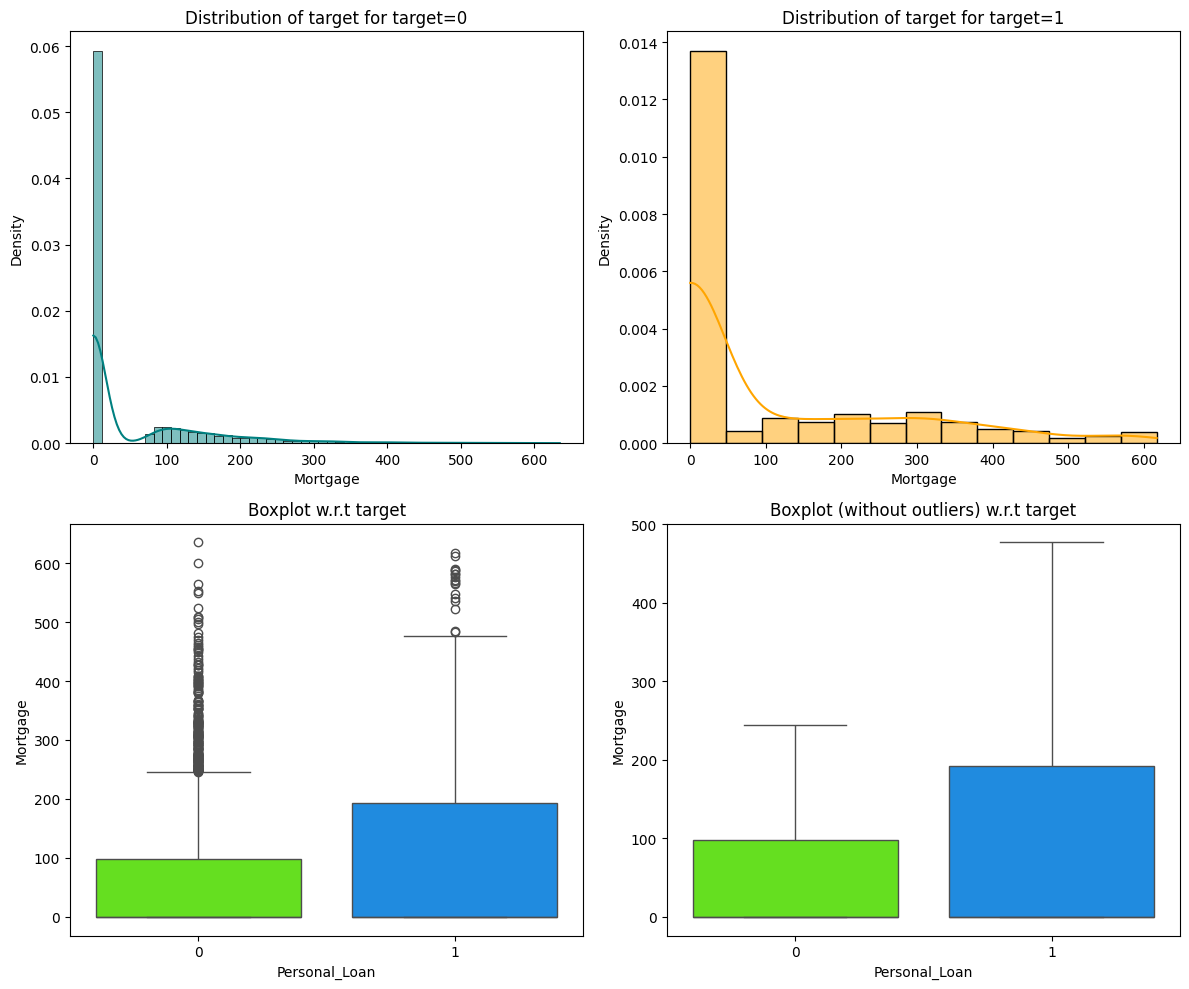

In [58]:
distribution_plot_wrt_target(data, "Mortgage", "Personal_Loan")

#### Securities Account vs Personal Loan

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


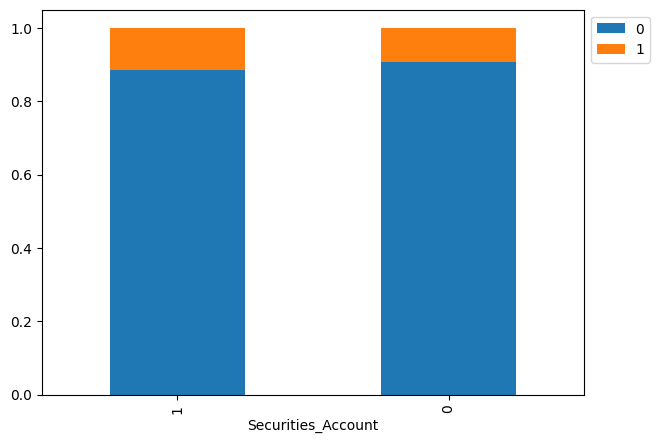

In [59]:
stacked_barplot(data, "Securities_Account", "Personal_Loan")

*   Securties account does sems to Influence Personal Loan


#### CD_Account vs Personal Loan

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


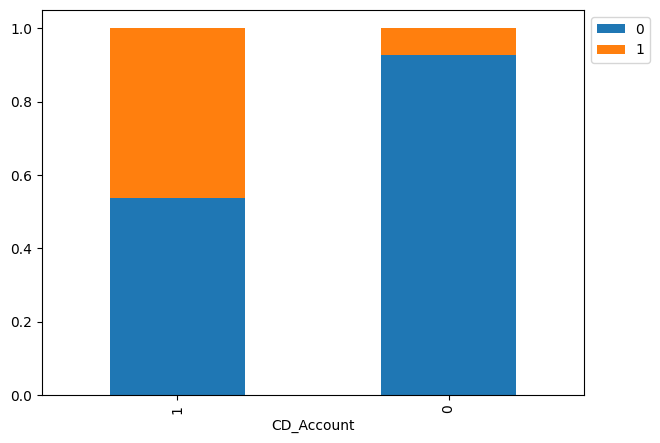

In [60]:
stacked_barplot(data, "CD_Account", "Personal_Loan")

Customers having CD account have more tendancy to have personal loan.

#### Online vs Personal Loan

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


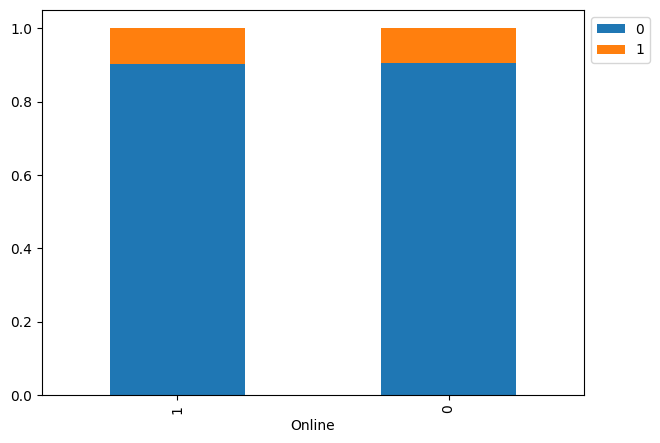

In [61]:
stacked_barplot(data, "Online", "Personal_Loan")

Customer using Internet banking doesn't seem to influence Personal loan

#### CreditCard vs Personal Loan

In [62]:
#Find out number of customers havin credit cards
data['CreditCard'].value_counts()


CreditCard
0    3530
1    1470
Name: count, dtype: int64

Customers having Credit Card does not see to have any direct realtionship on personal loans.

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


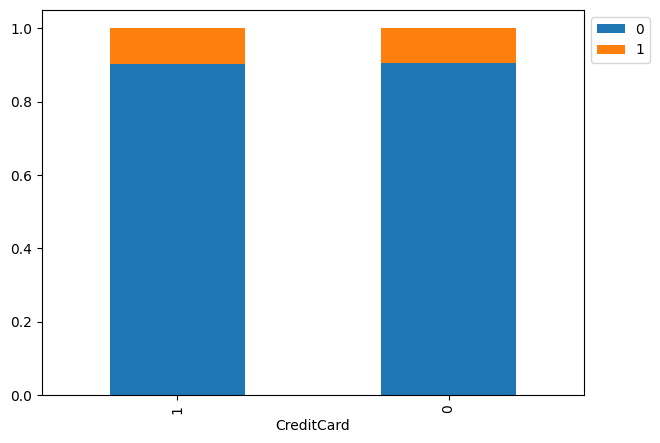

In [63]:
stacked_barplot(data, "CreditCard", "Personal_Loan")

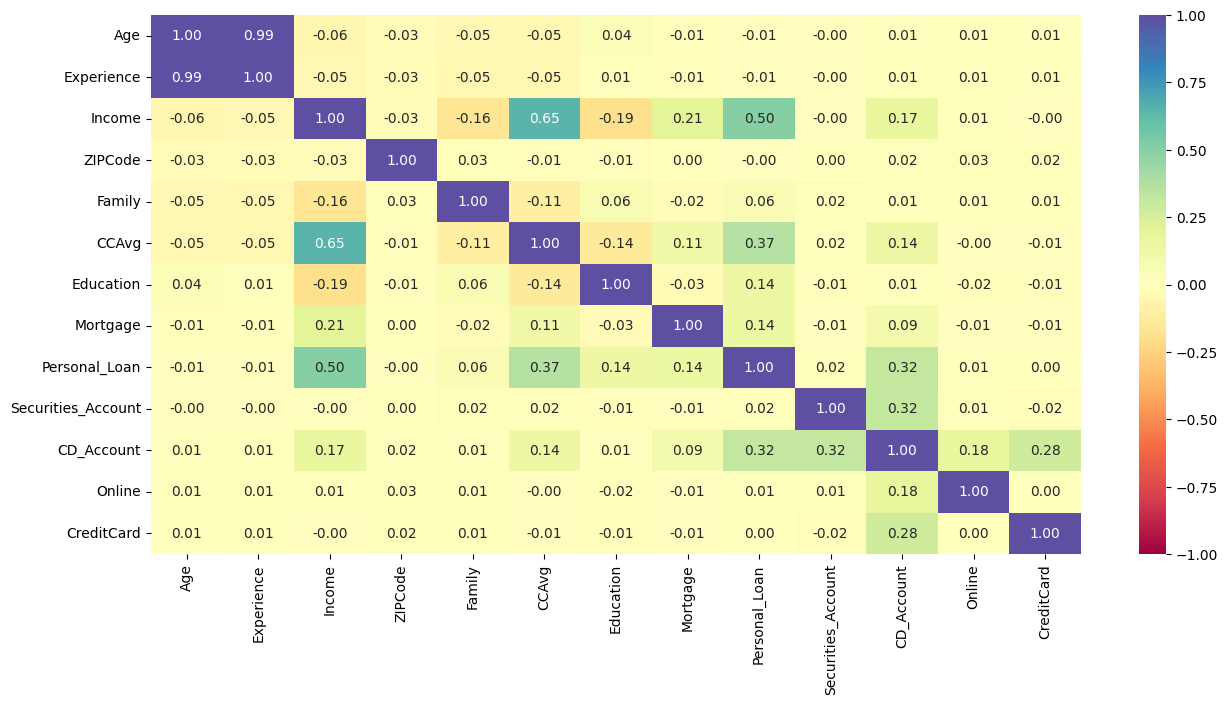

In [64]:
# Find out correaltion
numeric_df = data.select_dtypes(include=['float64', 'int64'])
corr = numeric_df.corr()

# plot the heatmap

plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

There is higher positive correlation between Age and Experience 0.99
There is positive correlation between CCAvg and Income and Income and Personal loan.

## Expore relation between Personal Loan and Income

In [65]:
#Probe Mortage data for outliers
Q1 = data['Mortgage'].quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data['Mortgage'].quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR
print("Lower bound for Mortgage",lower)
print("Upper bound for Mortgage",upper)

Lower bound for Mortgage -151.5
Upper bound for Mortgage 252.5


**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
    *   Mortgage data right skewed
    *   Majority of Mortgages between 50-175k
    *   There are Several outliers above 252k.


2. How many customers have credit cards?
   *   1470 customers have credit cards

3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
   *   Income,CCAvg and CD_Account have strong correlation with personal loan

4. How does a customer's interest in purchasing a loan vary with their age?
   *   Customers between below 26 years (23-25) do not have any personal loans
   *   Customers 66 years old and above (66-67) do not have any personal loans
   *   Customers as they get older will have less tendancy for a personal loan

5. How does a customer's interest in purchasing a loan vary with their education?
   *   As Education level is increasing Customers are applying for more Personal loans

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [66]:
#Installing sqlalchemy library as US Zip code is compatible with this version
!pip install sqlalchemy-mate==1.4.28.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 2.0 MB/s eta 0:00:00


In [67]:
#Installing USzipcode library to feature engineer zipcode
!pip install uszipcode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for atomicwrites: filename=atomicwrites-1.4.1-py2.py3-none-any.whl size=6941 sha256=1b971d7c15f23230e05e77168e5ec33c9b346a59d05f1010f7a720c17ef61023
  Stored in directory: /root/.cache/pip/wheels/34/07/0b/33b15f68736109f72ea0bb2499521d87312b932620737447a2
Successfully built atomicwrites


In [68]:
#Find out major Metro for Zip code, few Zipcodes need to be feature engineered as they were not resolving to major city
from uszipcode import SearchEngine, SimpleZipcode
search = SearchEngine()


def zco(x):
    city = search.by_zipcode(x)
    if city :
     return  city.major_city
    elif (x == 92717 or x == 92634 or x== 96651 ):
      return "Los Angeles"
    elif (x == 93077):
      return "Fresno"
    else:
      return "None"


data['metro'] = data['ZIPCode'].apply(zco)


Download /root/.uszipcode/simple_db.sqlite from https://github.com/MacHu-GWU/uszipcode-project/releases/download/1.0.1.db/simple_db.sqlite ...
  1.00 MB downloaded ...
  2.00 MB downloaded ...
  3.00 MB downloaded ...
  4.00 MB downloaded ...
  5.00 MB downloaded ...
  6.00 MB downloaded ...
  7.00 MB downloaded ...
  8.00 MB downloaded ...
  9.00 MB downloaded ...
  10.00 MB downloaded ...
  11.00 MB downloaded ...
  Complete!


In [69]:
#Understand distribtion of customers across cities
data['metro'].value_counts()

metro
Los Angeles      408
San Diego        269
San Francisco    257
Berkeley         241
Sacramento       148
                ... 
Sausalito          1
Ladera Ranch       1
Sierra Madre       1
Tahoe City         1
Stinson Beach      1
Name: count, Length: 244, dtype: int64

In [70]:
#Check for any zip code not being matched
zipData = data[data['metro'] == 'None']
zipData['ZIPCode'].value_counts()


Series([], Name: count, dtype: int64)

## Treating negative experience values

In [71]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [72]:
# Negative experience could be typo , convert Negative experience to postive
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [73]:
#convert columns to categorical columns
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard"

]
data[cat_cols] = data[cat_cols].astype("category")

In [74]:
#Dropping Target varibale and ZipCode
X = data.drop(["Personal_Loan","ZIPCode"], axis=1)
y = data["Personal_Loan"]

In [75]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)
X.head()

Age  Experience  Income  Family  CCAvg  Mortgage  Education_2  Education_3  \
0   25           1      49       4    1.6         0        False        False   
1   45          19      34       3    1.5         0        False        False   
2   39          15      11       1    1.0         0        False        False   
3   35           9     100       1    2.7         0         True        False   
4   35           8      45       4    1.0         0         True        False   

   Securities_Account_1  CD_Account_1  Online_1  CreditCard_1  metro_Alameda  \
0                  True         False     False         False          False   
1                  True         False     False         False          False   
2                 False         False     False         False          False   
3                 False         False     False         False          False   
4                 False         False     False          True          False   

   metro_Alamo  metro_Albany  metro_Alhambra  metro_Anaheim  metro_Antioch  \
0        False         False           False          False          False   
1        False         False           False          False          False   
2        False         False           False          False          False   
3        False         False           False          False          False   
4        False         False           False          False          False   

   metro_Aptos  metro_Arcadia  metro_Arcata  metro_Bakersfield  \
0        False          False         False              False   
1        False          False         False              False   
2        False          False         False              False   
3        False          False         False              False   
4        False          False         False              False   

   metro_Baldwin Park  metro_Banning  metro_Bella Vista  metro_Belmont  \
0               False          False              False          False   
1               False          False              False          False   
2               False          False              False          False   
3               False          False              False          False   
4               False          False              False          False   

   metro_Belvedere Tiburon  metro_Ben Lomond  metro_Berkeley  \
0                    False             False           False   
1                    False             False           False   
2                    False             False            True   
3                    False             False           False   
4                    False             False           False   

   metro_Beverly Hills  metro_Bodega Bay  metro_Bonita  metro_Boulder Creek  \
0                False             False         False                False   
1                False             False         False                False   
2                False             False         False                False   
3                False             False         False                False   
4                False             False         False                False   

   metro_Brea  metro_Brisbane  metro_Burlingame  metro_Calabasas  \
0       False           False             False            False   
1       False           False             False            False   
2       False           False             False            False   
3       False           False             False            False   
4       False           False             False            False   

   metro_Camarillo  metro_Campbell  metro_Canoga Park  metro_Capistrano Beach  \
0            False           False              False                   False   
1            False           False              False                   False   
2            False           False              False                   False   
3            False           False              False                   False   
4            False           False              Fa

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [77]:
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 3500
Number of rows in test data = 1500


In [78]:
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

### Model can make wrong predictions as:

1. Predicting a customer as not eligible for Personal Loan but in reality the customer will be a good candidate for Personal Loan.

2. Predicting a customer as eligble for Personal loan but in reality the customer would not be a good candidate for Personal Loan.


### Which case is more important?

* If we predict a eligible customer as a non-eligible customer ,bank would lose an opportunity of providing loan to a potential customer.Cost of missing opportunity vs potential loss of revenue need to be done.For the sake of this business case we will consider Loss of Opporunity as more impactful.

### How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.


### Model Building

### Build Decision Tree Model

In [79]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

### Model Performance Improvement

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
The model_performance_classification_sklearn function will be used to check the model performance of models.
The make_confusion_matrix function will be used to plot confusion matrix.

In [80]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [81]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Checking model performance on base model training set

In [82]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

Above model for training data looks to be overfitting as accuracy,recall,precision and F1 are 1.0, further model refinement may be needed

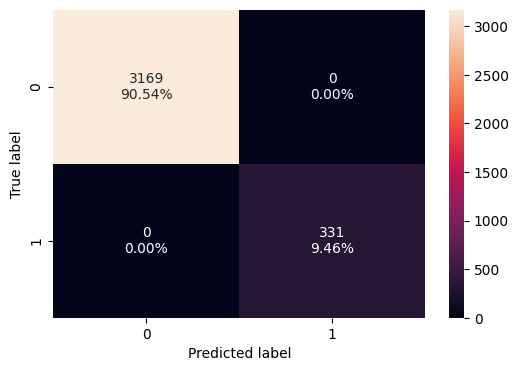

In [83]:
confusion_matrix_sklearn(model, X_train, y_train)

### Checking model performance on test set

In [84]:
decision_tree_perf_test = model_performance_classification_sklearn(
    model, X_test, y_test
)
decision_tree_perf_test

Accuracy    Recall  Precision        F1
0  0.982667  0.879195   0.942446  0.909722

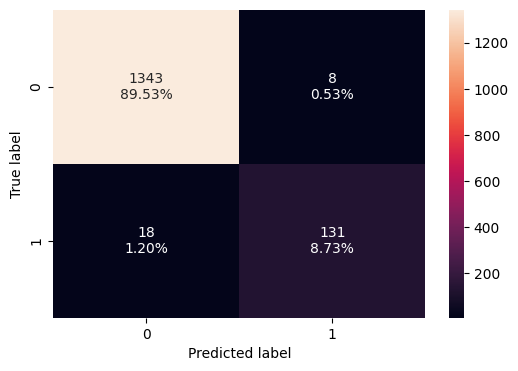

In [85]:
confusion_matrix_sklearn(model, X_test, y_test)


*   Modelel is giving good and generalized results on training and test set with recall at 87% .
*   Model predicted 0.53% as Ineligble for loan but In reality they were elibile

### Visualizing the Decision Tree

In [86]:
column_names = list(X.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1', 'metro_Alameda', 'metro_Alamo', 'metro_Albany', 'metro_Alhambra', 'metro_Anaheim', 'metro_Antioch', 'metro_Aptos', 'metro_Arcadia', 'metro_Arcata', 'metro_Bakersfield', 'metro_Baldwin Park', 'metro_Banning', 'metro_Bella Vista', 'metro_Belmont', 'metro_Belvedere Tiburon', 'metro_Ben Lomond', 'metro_Berkeley', 'metro_Beverly Hills', 'metro_Bodega Bay', 'metro_Bonita', 'metro_Boulder Creek', 'metro_Brea', 'metro_Brisbane', 'metro_Burlingame', 'metro_Calabasas', 'metro_Camarillo', 'metro_Campbell', 'metro_Canoga Park', 'metro_Capistrano Beach', 'metro_Capitola', 'metro_Cardiff By The Sea', 'metro_Carlsbad', 'metro_Carpinteria', 'metro_Carson', 'metro_Castro Valley', 'metro_Ceres', 'metro_Chatsworth', 'metro_Chico', 'metro_Chino', 'metro_Chino Hills', 'metro_Chula Vista', 'metro_Citrus Heights', 'metro_Claremont', 'metro_Clearlake'

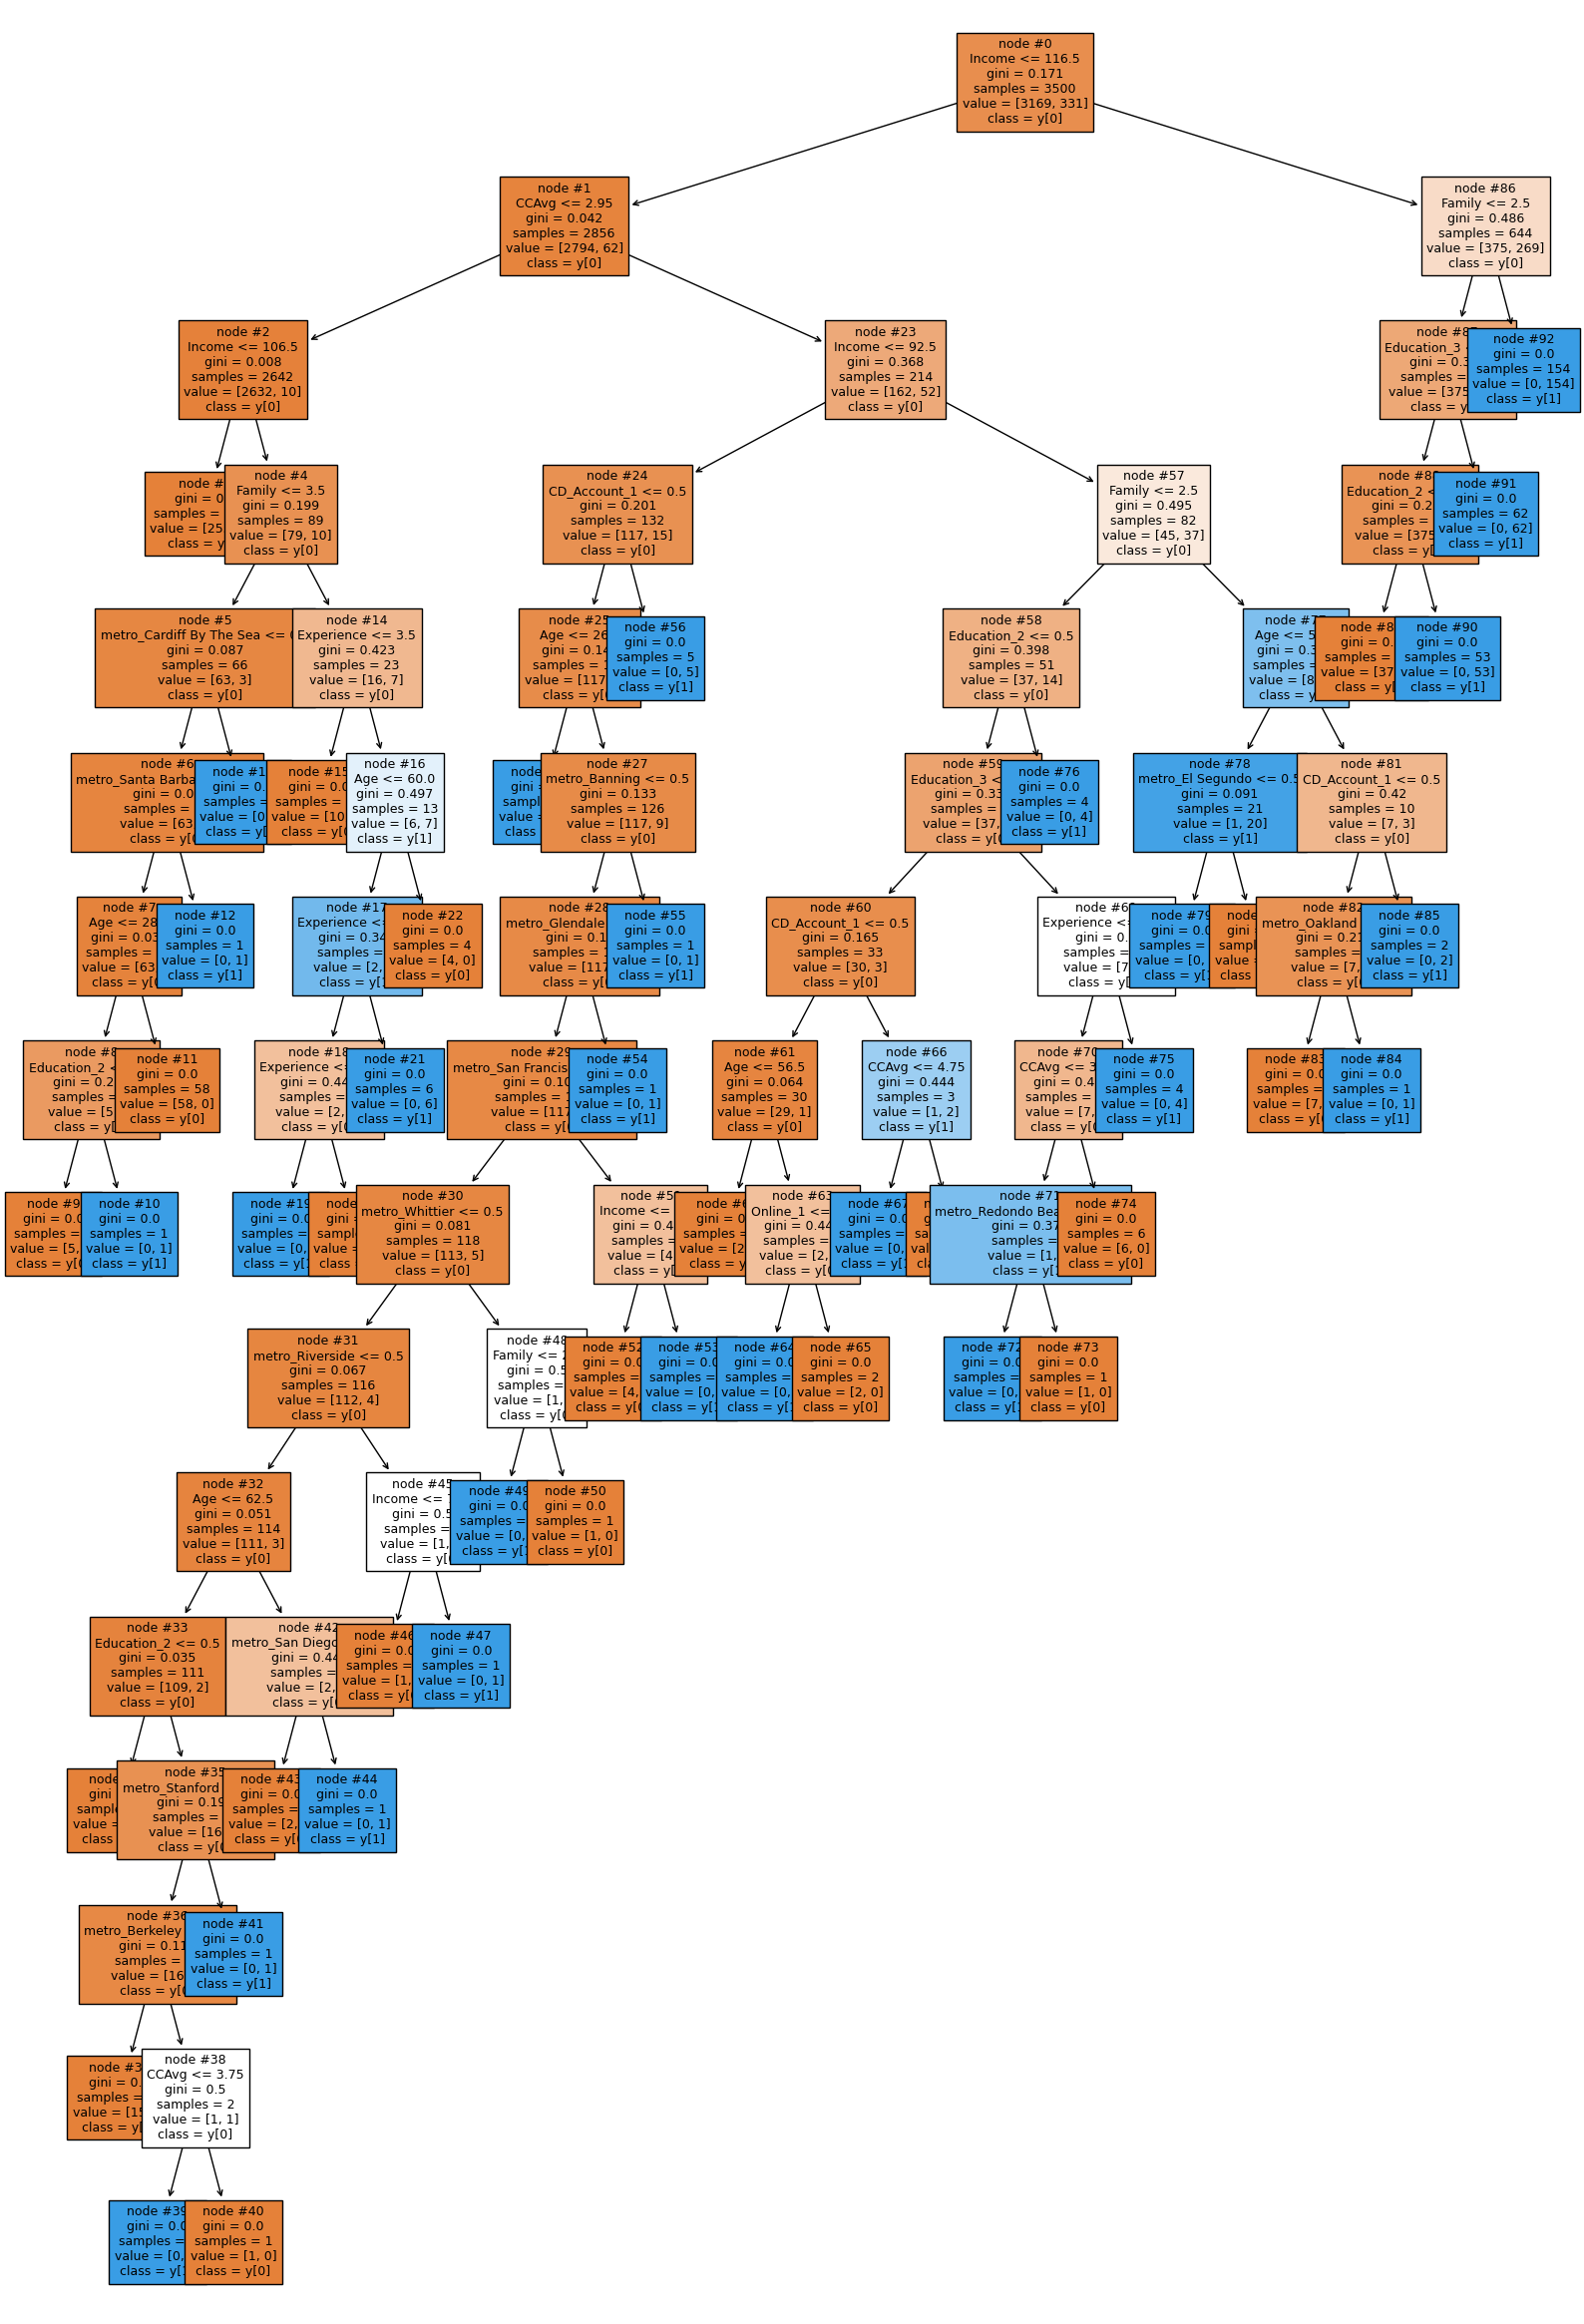

In [87]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [88]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- metro_Cardiff By The Sea <= 0.50
|   |   |   |   |   |--- metro_Santa Barbara <= 0.50
|   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |--- weights: [58.00, 0.00] class: 0
|   |   |   |   |   |--- metro_Santa Barbara >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- metro_Cardiff By The Sea >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |  

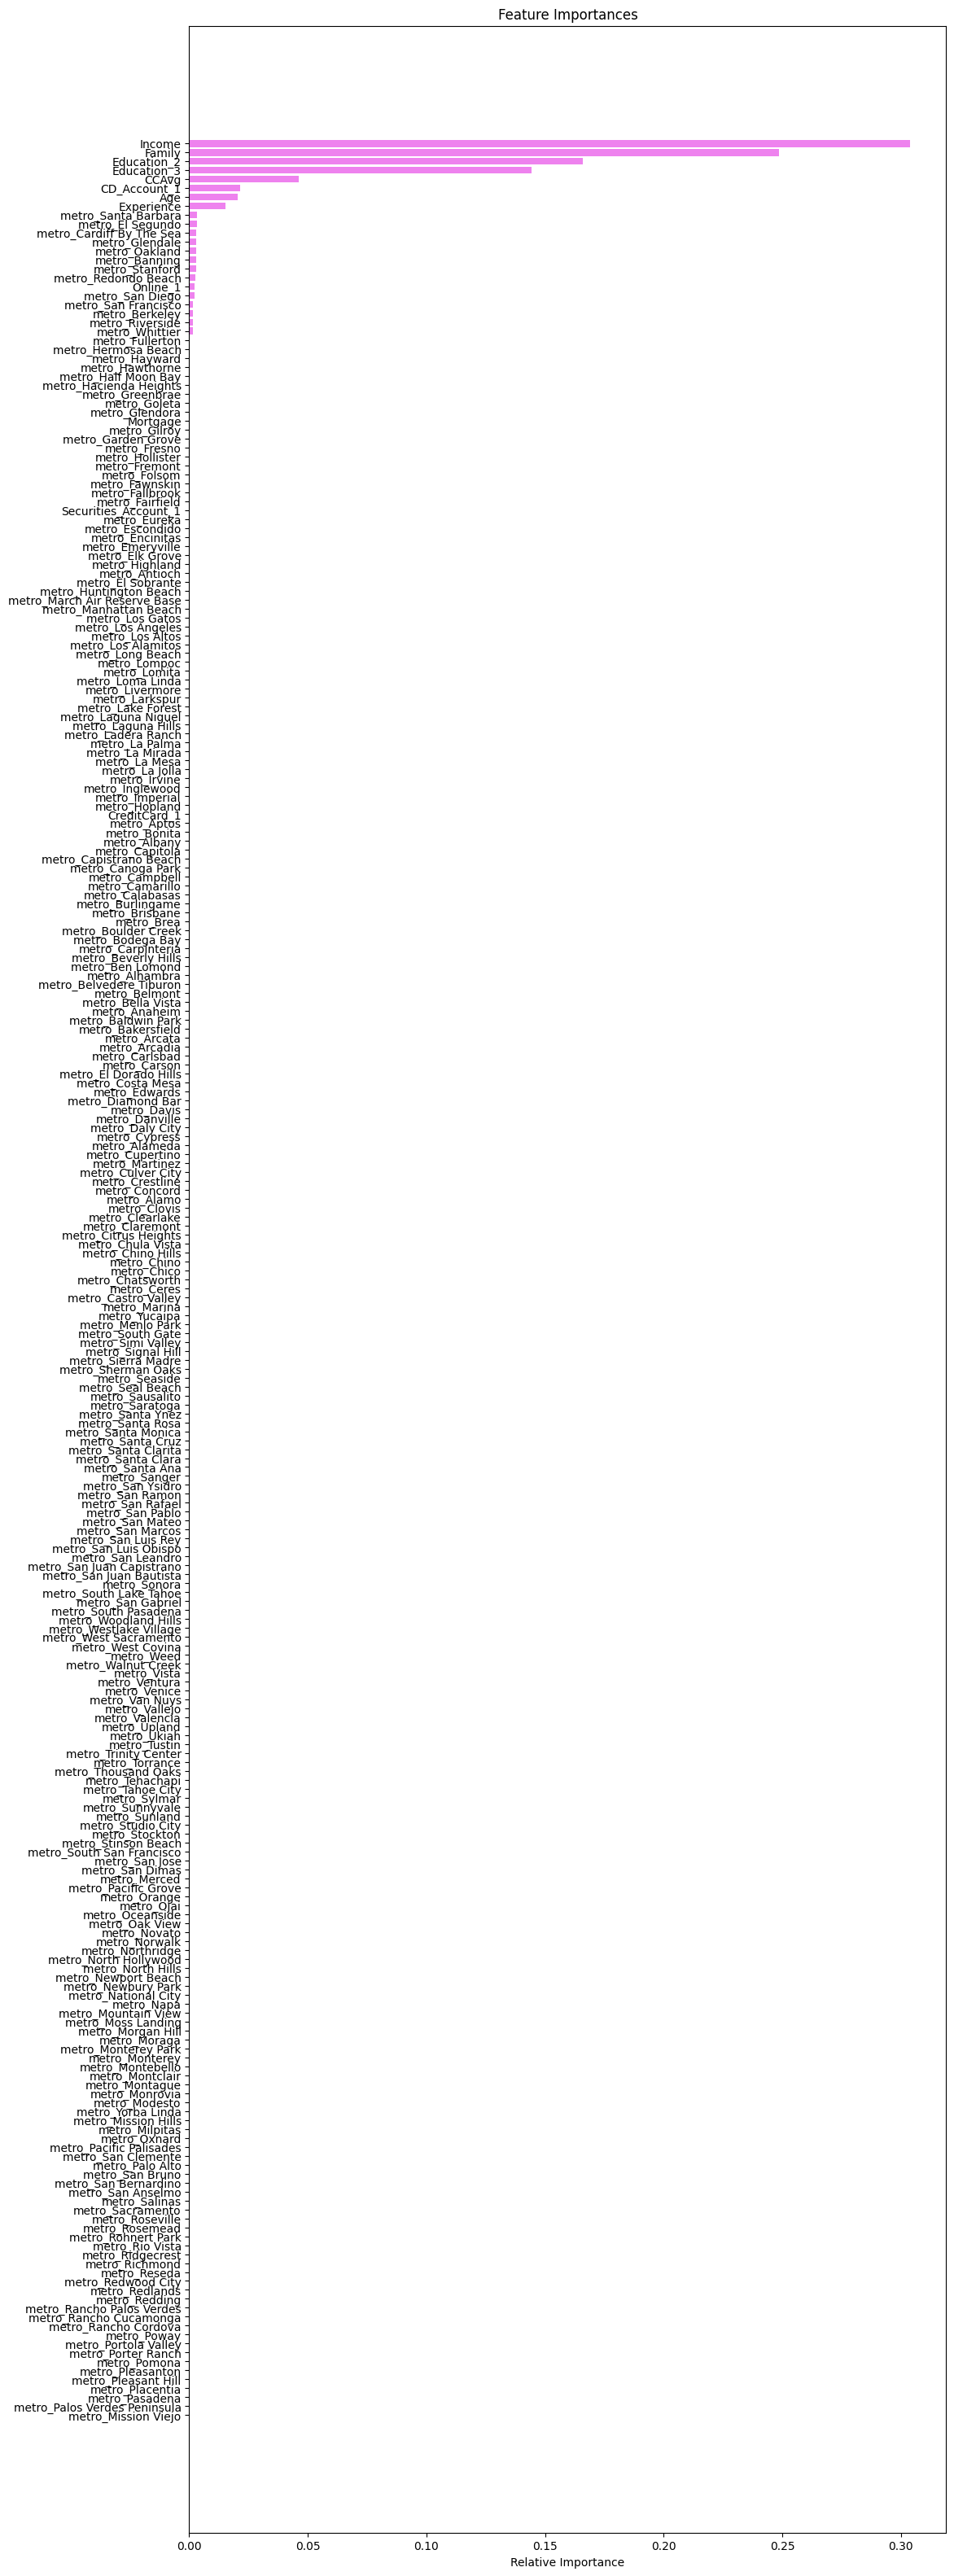

In [89]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 40))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income,Family and Education Level 2 and Education Level are top 3 important features.

### Decision Tree (Pre-pruning)

#### Using GridSearch for Hyperparameter tuning of our tree model
* Let's see if we can improve our model performance even more.

In [90]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from

parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    }

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, max_leaf_nodes=10,
                       random_state=1)

### Checking performance Pre-Pruned model on training set

In [91]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(
    estimator, X_train, y_train
)
decision_tree_tune_perf_train

Accuracy    Recall  Precision        F1
0  0.985714  0.873112   0.973064  0.920382

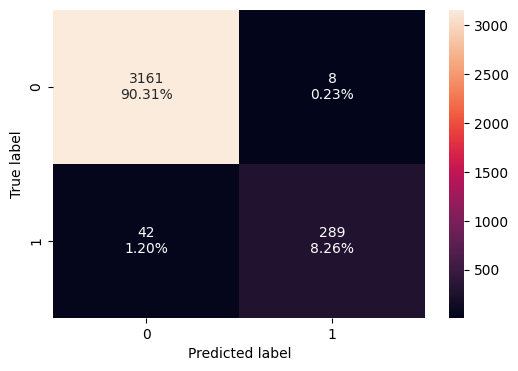

In [92]:
confusion_matrix_sklearn(estimator, X_train, y_train)

* Model is less complex with max depth 6 and maximum nodes
* Recall at 87% same as base model on the training set

### Checking model performance on test set

In [93]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(
    estimator, X_test, y_test
)

decision_tree_tune_perf_test

Accuracy    Recall  Precision        F1
0  0.976667  0.785235      0.975  0.869888

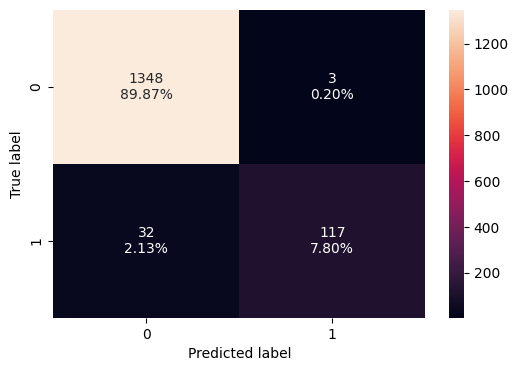

In [94]:
confusion_matrix_sklearn(estimator, X_test, y_test)

* After hyperparameter tuning the model significant degrdation of performance with recall score 0.78.

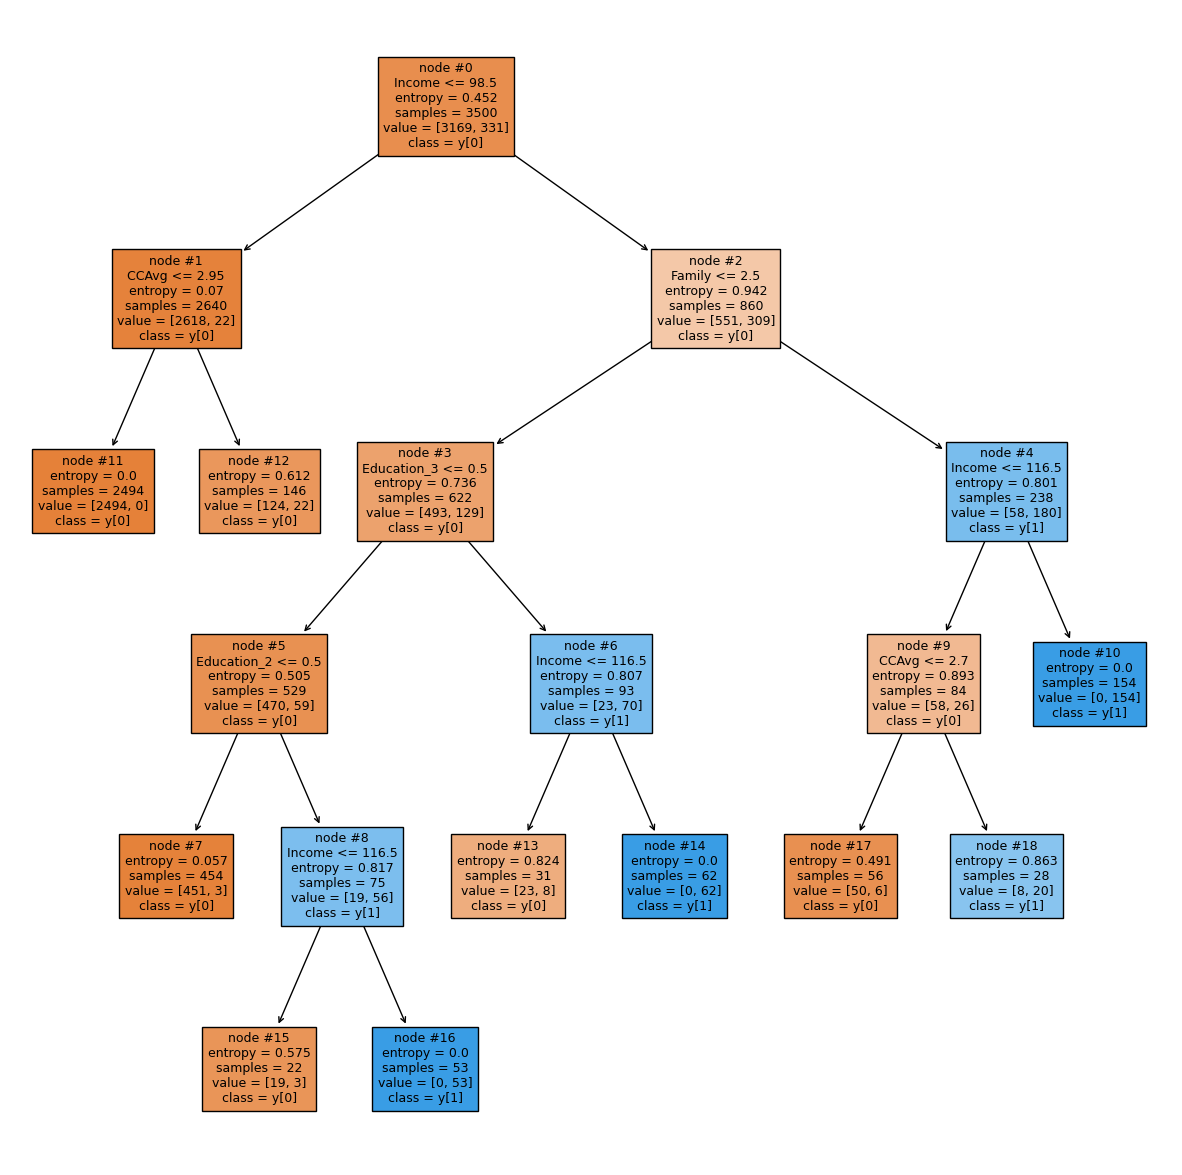

In [95]:
plt.figure(figsize=(15, 15))

tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
plt.show()

* tree is Simplified after pre-pruning.

### Cost Complexity Pruning

In [96]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [97]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000    0.000000
1     0.000269    0.000538
2     0.000275    0.002736
3     0.000276    0.003288
4     0.000281    0.003851
5     0.000381    0.004232
6     0.000381    0.004613
7     0.000429    0.005041
8     0.000500    0.005541
9     0.000506    0.008070
10    0.000508    0.008578
11    0.000537    0.009651
12    0.000544    0.010196
13    0.000625    0.010821
14    0.000700    0.011521
15    0.000771    0.012292
16    0.000792    0.015460
17    0.000800    0.016260
18    0.000940    0.017200
19    0.001305    0.018505
20    0.001647    0.020153
21    0.002333    0.022486
22    0.002407    0.024893
23    0.003294    0.028187
24    0.006473    0.034659
25    0.025146    0.084951
26    0.039216    0.124167
27    0.047088    0.171255

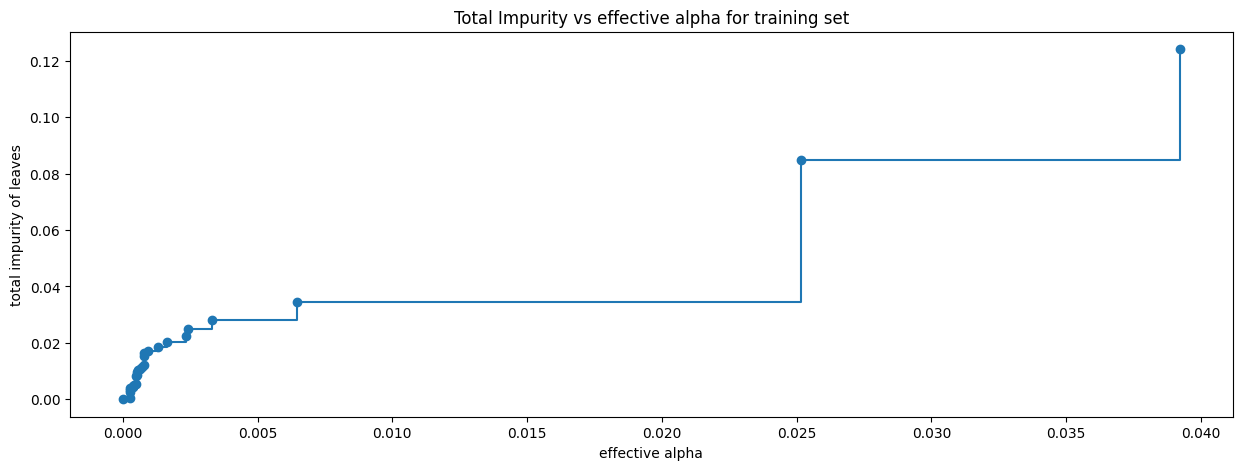

In [98]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using the effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [99]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766



For the remainder, we remove the last element in
``clfs`` and ``ccp_alphas``, because it is the trivial tree with only one
node. Here we show that the number of nodes and tree depth decreases as alpha
increases.

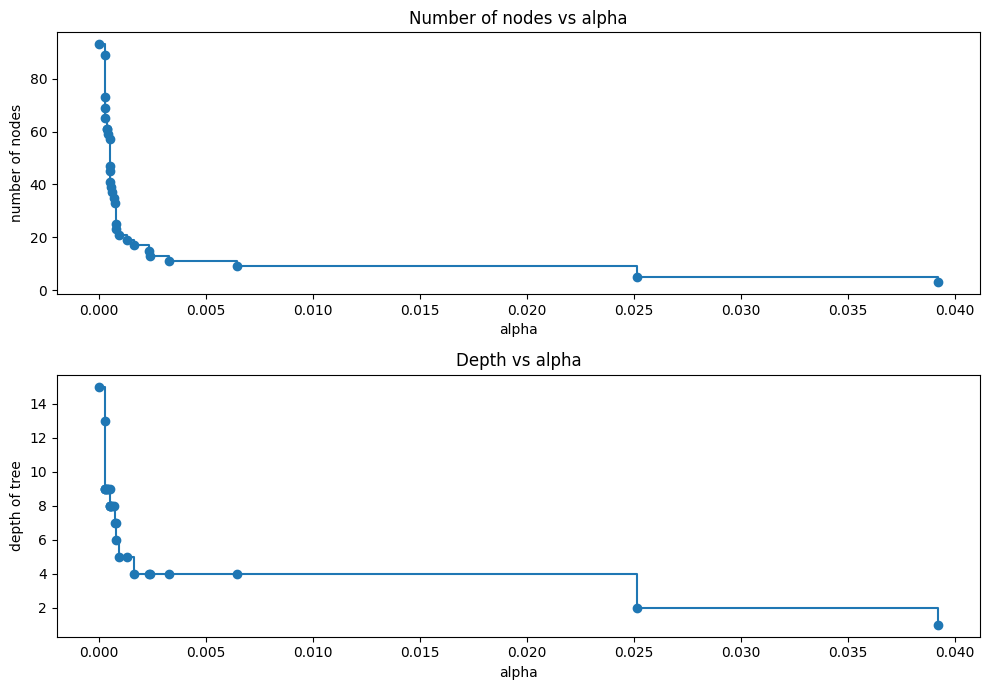

In [100]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

### Recall vs alpha for training and testing sets

In [101]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

In [102]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

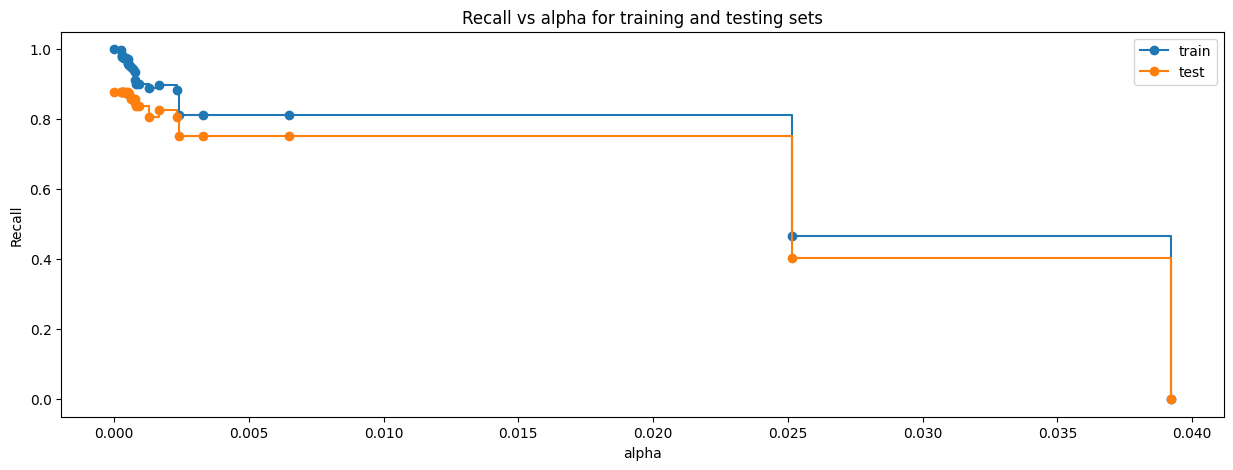

In [103]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [104]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


### Checking model performance on training set

In [105]:
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(
    best_model, X_train, y_train
)
decision_tree_postpruned_perf_train

Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0

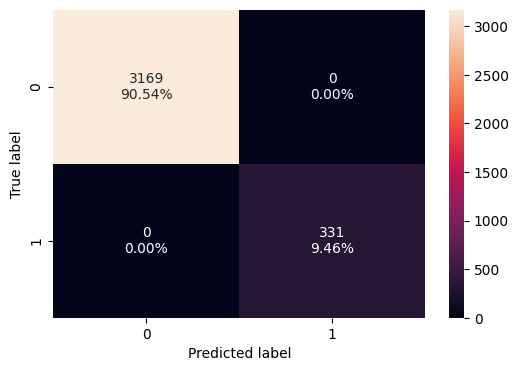

In [106]:
confusion_matrix_sklearn(best_model, X_train, y_train)

### Checking model performance on test set

In [107]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(
    best_model, X_test, y_test
)
decision_tree_postpruned_perf_test

Accuracy    Recall  Precision        F1
0  0.982667  0.879195   0.942446  0.909722

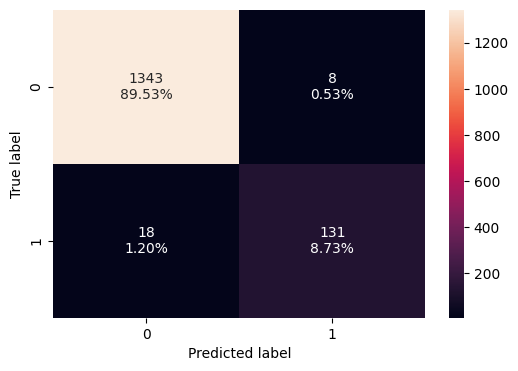

In [108]:
confusion_matrix_sklearn(best_model, X_test, y_test)

* With post-pruning we are getting good and generalized model performance on both training and test set.
* The recall has improved further.
* Metrics for Cost complexity model is similar to base model

### Visualizing the Decision Tree

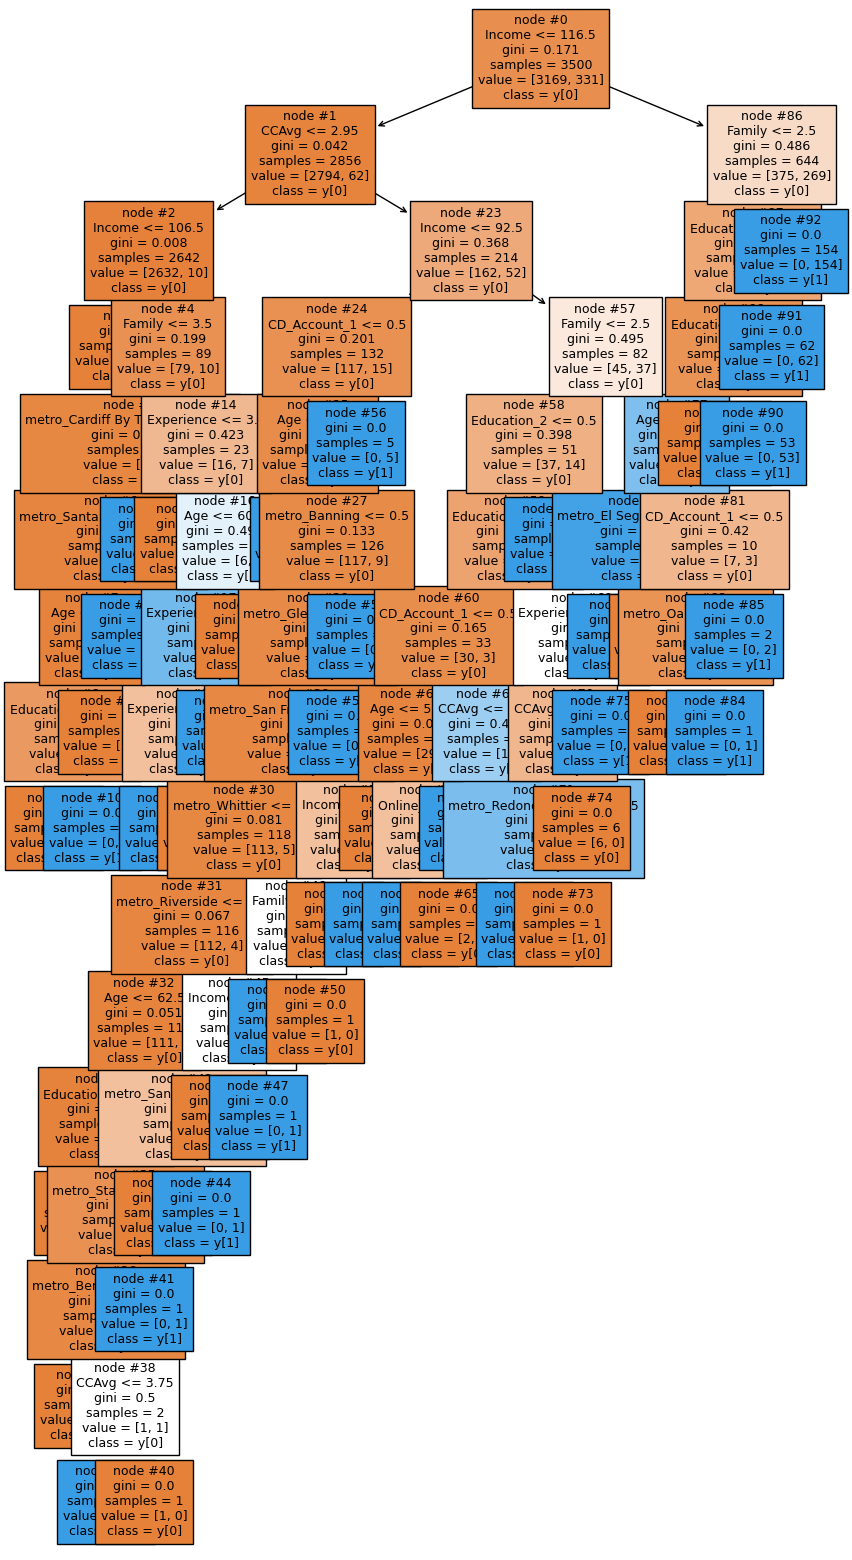

In [110]:
plt.figure(figsize=(10, 20))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [111]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- metro_Cardiff By The Sea <= 0.50
|   |   |   |   |   |--- metro_Santa Barbara <= 0.50
|   |   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |   |--- weights: [58.00, 0.00] class: 0
|   |   |   |   |   |--- metro_Santa Barbara >  0.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- metro_Cardiff By The Sea >  0.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |  

In [112]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                             Imp
Income                  0.303933
Family                  0.248530
Education_2             0.165971
Education_3             0.144207
CCAvg                   0.046194
...                          ...
metro_Huntington Beach  0.000000
metro_Imperial          0.000000
metro_Inglewood         0.000000
metro_Irvine            0.000000
metro_Yucaipa           0.000000

[255 rows x 1 columns]


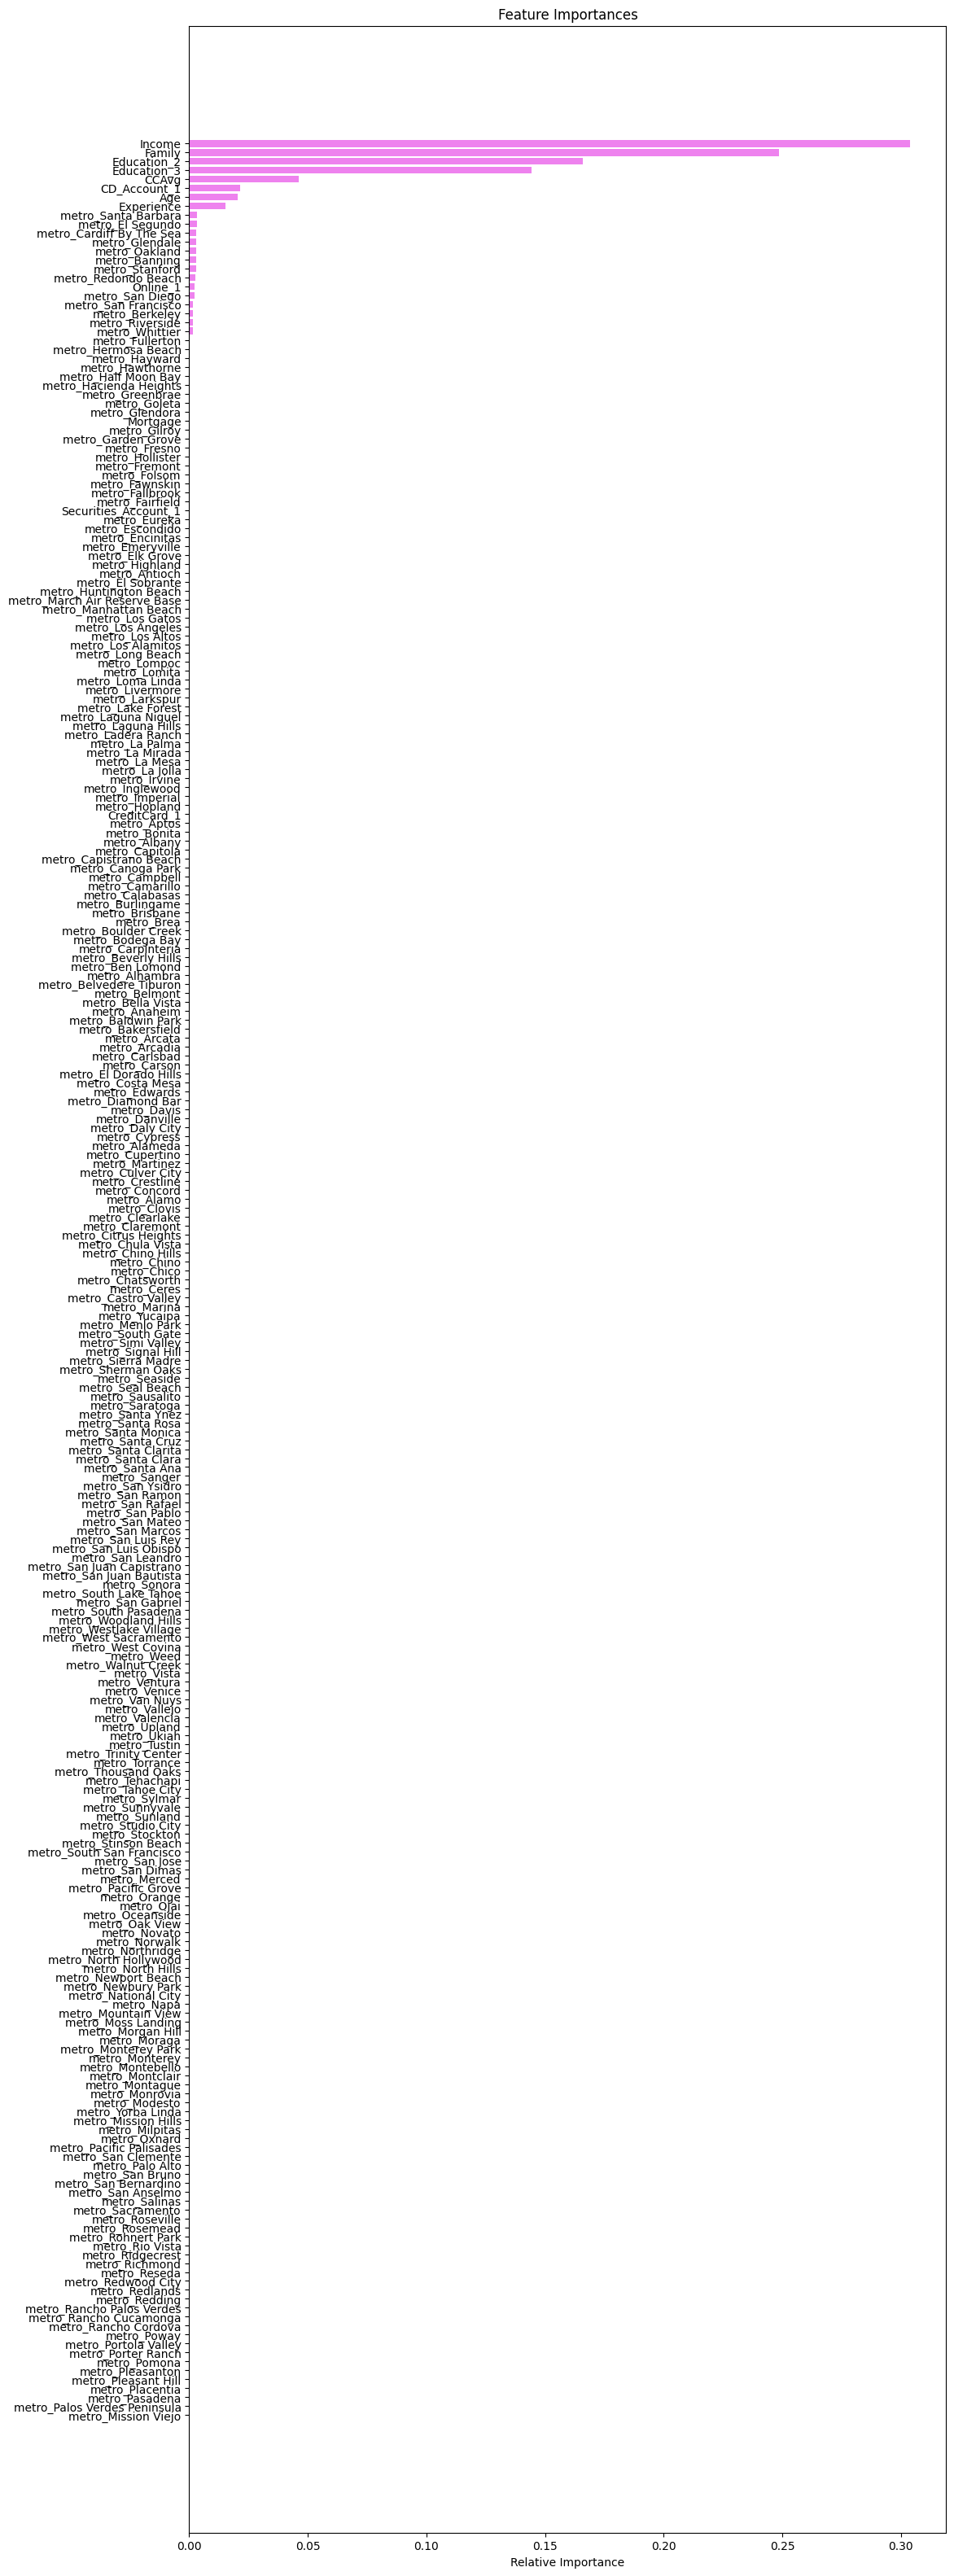

In [113]:
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 40))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* Income,Family and Education remain the most important features with post-pruning too.

## Model Comparison and Final Model Selection

In [114]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_train.T,
        decision_tree_tune_perf_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                     1.0                     0.985714   
Recall                       1.0                     0.873112   
Precision                    1.0                     0.973064   
F1                           1.0                     0.920382   

           Decision Tree (Post-Pruning)  
Accuracy                            1.0  
Recall                              1.0  
Precision                           1.0  
F1                                  1.0

In [115]:
# test performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_perf_test.T,
        decision_tree_tune_perf_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Test set performance comparison:")
models_train_comp_df

Test set performance comparison:


Decision Tree sklearn  Decision Tree (Pre-Pruning)  \
Accuracy                0.982667                     0.976667   
Recall                  0.879195                     0.785235   
Precision               0.942446                     0.975000   
F1                      0.909722                     0.869888   

           Decision Tree (Post-Pruning)  
Accuracy                       0.982667  
Recall                         0.879195  
Precision                      0.942446  
F1                             0.909722

* Decision tree with post-pruning is giving the highest recall on the test set same as Base model.
* The tree with post pruning is similar in comparison to base model.
* We can use base model as its giving best metrics including recall score.

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

* Income,Family and Education Levels are the most important variables in determining potential customer for personal loan
* Marketing Campaign can focus on agen group between 26-65.
* Customers having Income below 60k or above 200k have less tendancy to apply for personal loan. Either they can be omitted from campaign or have seperate campaign to attract these customers.
* Marketing campaign can focus on customers having average Credit Card balance more than 2K
* Marketing Campaign according to decision tree model should depend on three main factors - Income,Family and Education Levels,
 that is - Income level between 60k-200k, Family of 2 or more and education level of Graduates or Advanced/Professional which can lead to successful campaign.
* Bank can look to build separate models for unrepresented categories like under graduates and customers with below 60k income for further analysis

___